In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:


from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")



In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0             NEAR OCEAN         1
-118.19    34.12     35.0                2524.0       749.0           2487.0      679.0       2.4932         167700.0            <1H OCEAN          1
           34.13     52.0                2012.0       458.0           1314.0      434.0       3.9250         180400.0            <1H OCEAN          1
                     50.0                1309.0       302.0           883.0       293.0       3.1287         198000.0            <1H OCEAN          1
           34.12     52.0                679.0        132.0           483.0       163.0       4.2344         162500.0            <1H OCEAN          1
                                                                                                         

In [7]:
housing["total_bedrooms"].value_counts()

total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
1609.0     1
1591.0     1
2506.0     1
2238.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

In [8]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing["longitude"].value_counts()

longitude
-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-115.94      1
-116.08      1
-123.50      1
-114.66      1
-114.63      1
Name: count, Length: 844, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


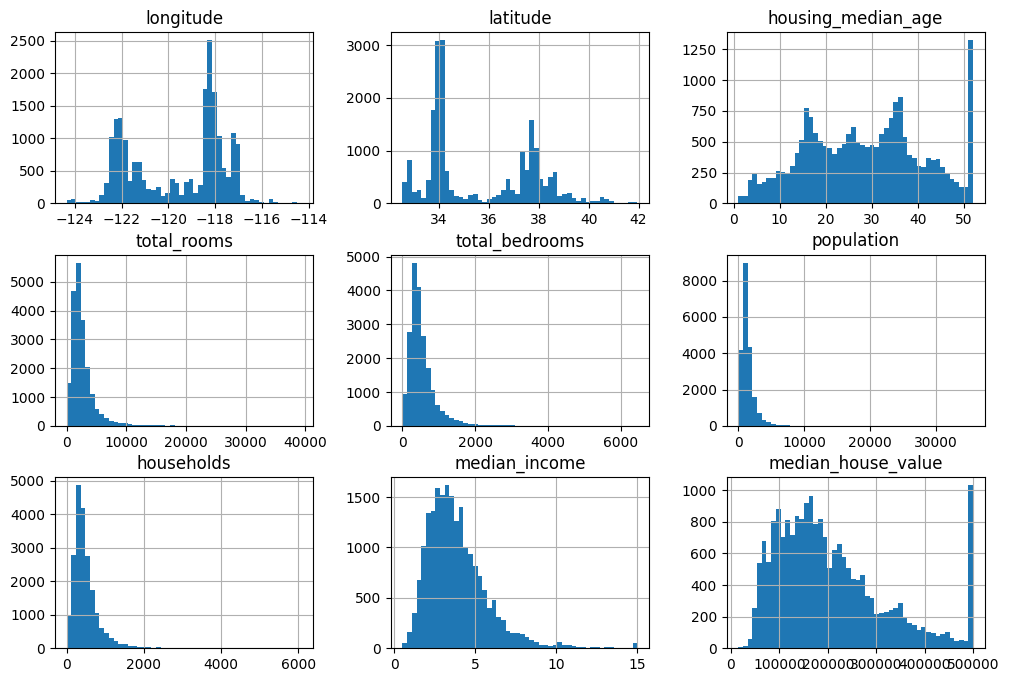

In [11]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize= (12,8))
plt.show()

 # Create a Test Set

In [12]:
import numpy as np
np.random.seed(42)

In [13]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices [test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [15]:
len(test_set)

4128

In [16]:
np.random.seed(42)

In [17]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id,0.2,"index")

In [19]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split (housing ,test_size=0.2, random_state=42)

In [21]:
test_set["total_bedrooms"].isnull().sum()

44

In [22]:
test_set["ocean_proximity"].isnull().sum()

0

In [23]:
from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929913


In [24]:


housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])



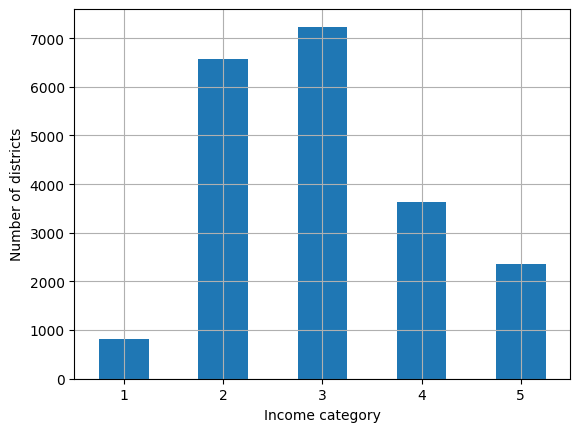

In [25]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")

plt.show()

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [27]:
strat_train_set, strat_test_set = strat_splits[0]

In [28]:
strat_train_set, start_test_set = train_test_split(housing, test_size= 0.2, stratify =housing["income_cat"], random_state =42)

In [29]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [30]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(housing["income_cat"], axis=1, inplace=True)

KeyError: '[5, 5, 5, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 3, 2, 2, 1, 1, 3, 3, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 3, 5, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 5, 4, 3, 3, 4, 3, 4, 4, 5, 3, 3, 3, 3, 3, 4, 5, 2, 3, 3, 5, 3, 2, 4, 1, 5, 3, 3, 4, 5, 4, 3, 3, 3, 3, 2, 2, 2, 3, 3, 5, 3, 3, 3, 3, 2, 4, 3, 4, 4, 2, 3, 3, 3, 5, 5, 3, 2, 3, 2, 5, 5, 1, 1, 3, 2, 2, 2, 2, 2, 3, 3, 4, 2, 2, 2, 2, 3, 2, 2, 5, 3, 2, 2, 3, 4, 3, 4, 2, 3, 2, 2, 3, 5, 5, 2, 2, 3, 3, 2, 3, 5, 5, 5, 2, 4, 3, 3, 3, 4, 3, 4, 2, 3, 2, 2, 4, 2, 3, 2, 3, 5, 4, 3, 5, 1, 3, 2, 2, 2, 2, 3, 3, 3, 4, 3, 4, 1, 3, 1, 2, 2, 3, 2, 3, 2, 2, 2, 5, 2, 5, 2, 3, 3, 3, 2, 3, 5, 3, 3, 1, 4, 3, 2, 3, 2, 4, 3, 1, 3, 4, 3, 4, 2, 5, 3, 3, 3, 4, 3, 5, 3, 3, 3, 2, 3, 5, 2, 2, 5, 3, 3, 3, 4, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 3, 2, 5, 3, 1, 4, 2, 3, 3, 2, 3, 3, 4, 3, 1, 3, 3, 3, 3, 3, 5, 5, 3, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 1, 3, 4, 5, 3, 3, 2, 4, 3, 5, 4, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 2, 4, 2, 4, 4, 3, 2, 3, 3, 2, 4, 3, 4, 3, 1, 2, 3, 2, 3, 2, 4, 4, 1, 3, 4, 3, 2, 5, 4, 3, 3, 3, 4, 5, 1, 2, 3, 3, 2, 2, 4, 2, 2, 1, 3, 4, 2, 3, 3, 4, 3, 4, 2, 3, 3, 3, 2, 3, 3, 2, 3, 4, 3, 3, 2, 2, 3, 3, 3, 2, 5, 5, 4, 3, 2, 2, 4, 5, 5, 3, 3, 5, 3, 4, 1, 4, 3, 2, 2, 3, 3, 4, 5, 3, 3, 3, 4, 3, 3, 3, 5, 2, 5, 2, 5, 3, 2, 3, 3, 5, 4, 3, 2, 3, 2, 2, 2, 1, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 1, 3, 4, 4, 3, 4, 2, 4, 3, 5, 3, 2, 2, 2, 2, 4, 4, 2, 3, 2, 3, 2, 5, 4, 4, 4, 2, 3, 4, 4, 3, 2, 3, 3, 2, 3, 2, 3, 4, 3, 5, 4, 2, 5, 2, 2, 3, 2, 4, 5, 4, 3, 5, 4, 2, 2, 4, 3, 4, 4, 4, 2, 5, 4, 3, 4, 2, 3, 2, 2, 2, 1, 1, 3, 2, 3, 5, 3, 4, 3, 4, 2, 2, 2, 4, 3, 3, 3, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 5, 3, 2, 2, 3, 5, 4, 3, 2, 5, 5, 4, 2, 2, 3, 2, 2, 3, 2, 2, 4, 4, 5, 4, 2, 3, 3, 4, 2, 2, 2, 3, 2, 3, 2, 4, 3, 4, 1, 2, 2, 3, 3, 3, 2, 5, 4, 2, 2, 3, 4, 4, 3, 5, 3, 4, 3, 2, 3, 2, 3, 5, 4, 5, 3, 4, 3, 3, 3, 3, 3, 2, 3, 5, 5, 4, 4, 2, 3, 3, 2, 3, 2, 3, 3, 4, 3, 3, 2, 2, 2, 4, 3, 3, 3, 2, 5, 2, 5, 3, 5, 2, 1, 3, 1, 4, 2, 2, 4, 4, 5, 3, 3, 4, 2, 5, 3, 2, 3, 3, 3, 4, 4, 3, 4, 2, 2, 5, 3, 4, 5, 2, 1, 2, 5, 3, 3, 3, 4, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 4, 3, 4, 3, 4, 3, 5, 3, 3, 2, 3, 4, 3, 2, 2, 4, 3, 3, 5, 4, 3, 5, 3, 4, 3, 2, 3, 1, 3, 2, 2, 3, 4, 4, 5, 2, 4, 3, 3, 5, 3, 3, 3, 2, 2, 3, 4, 4, 2, 4, 2, 2, 2, 3, 3, 3, 4, 3, 3, 3, 2, 2, 3, 5, 4, 3, 2, 1, 4, 2, 2, 2, 4, 3, 4, 2, 2, 2, 5, 3, 1, 3, 3, 3, 4, 3, 3, 5, 3, 2, 2, 5, 2, 5, 2, 2, 2, 3, 2, 5, 3, 3, 5, 4, 3, 3, 2, 4, 3, 3, 5, 3, 2, 2, 5, 2, 2, 3, 3, 1, 3, 4, 3, 2, 2, 3, 5, 3, 2, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 2, 5, 1, 1, 4, 1, 2, 3, 2, 2, 5, 2, 2, 3, 3, 4, 2, 3, 3, 2, 2, 5, 5, 3, 2, 3, 3, 2, 4, 2, 2, 4, 3, 4, 2, 3, 3, 3, 3, 3, 2, 3, 3, 4, 2, 3, 1, 3, 3, 2, 3, 2, 5, 4, 3, 5, 5, 4, 4, 3, 5, 2, 2, 2, 4, 3, 3, 4, 2, 1, 2, 3, 3, 3, 3, 4, 4, 2, 2, 5, 3, 3, 3, 4, 4, 4, 2, 5, 3, 3, 5, 3, 2, 2, 2, 1, 3, 4, 3, 5, 4, 4, 3, 3, 3, 2, 3, 2, 4, 3, 4, 2, 1, 2, 3, 2, 2, 3, 3, 2, 3, 5, 4, 3, 2, 5, 2, 3, 4, 3, 2, 4, 5, 3, 3, 2, 3, 5, 2, 3, 5, 3, 3, 2, 3, 3, 4, 3, 1, 4, 2, 4, 1, 4, 2, 5, 4, 3, 5, 2, 2, 3, 4, 3, 3, 2, 3, 4, 5, 4, 2, 3, 2, 3, 5, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 4, 3, 2, 4, 5, 2, 3, 3, 4, 2, 2, 3, 4, 3, 2, 3, 4, 3, 5, 1, 2, 1, 2, 2, 2, 2, 2, 4, 4, 2, 3, 1, 3, 3, 4, 2, 2, 3, 2, 5, 2, 3, 4, 5, 3, 2, 3, 2, 2, 4, 5, 3, 3, 2, 3, 3, 2, 5, 2, 4, 2, 2, 2, 3, 3, 4, 2, 2, 5, 3, 2, 3, 3, 2, 2, 4, 5, 3, 3, 5, 3, 5, 3, 2, 4, 5, 2, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 5, 4, 3, 4, 2, 3, 2, 5, 3, 2, 3, 3, 4, 3, 2, 3, 3, 4, 2, 2, 4, 2, 2, 2, 2, 3, 2, 3, 5, 3, 2, 5, 2, 3, 3, 1, 3, 2, 3, 3, 4, 3, 2, 2, 3, 3, 2, 4, 4, 3, 2, 3, 2, 2, 3, 1, 2, 4, 3, 3, 4, 1, 4, 2, 5, 2, 3, 3, 3, 2, 5, 3, 2, 2, 2, 4, 5, 3, 2, 2, 4, 3, 4, 2, 2, 4, 4, 2, 2, 3, 4, 2, 2, 5, 4, 3, 4, 2, 2, 5, 3, 5, 2, 2, 3, 5, 3, 3, 5, 2, 3, 4, 2, 1, 2, 2, 4, 3, 4, 5, 4, 4, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 3, 2, 3, 3, 4, 3, 3, 2, 1, 4, 3, 2, 2, 2, 2, 3, 5, 3, 5, 2, 4, 4, 3, 1, 3, 3, 3, 3, 3, 2, 1, 2, 2, 4, 5, 2, 4, 3, 3, 4, 3, 1, 4, 4, 4, 3, 5, 2, 4, 3, 5, 5, 3, 5, 2, 2, 1, 3, 3, 5, 2, 3, 4, 3, 3, 5, 3, 3, 1, 1, 4, 3, 2, 3, 2, 3, 4, 2, 5, 4, 3, 2, 3, 4, 3, 3, 4, 3, 2, 5, 3, 2, 3, 5, 2, 3, 2, 2, 1, 2, 4, 1, 4, 3, 2, 3, 3, 5, 4, 3, 5, 1, 3, 3, 3, 3, 3, 1, 3, 5, 3, 3, 2, 2, 5, 3, 2, 5, 2, 5, 4, 3, 2, 5, 4, 5, 4, 3, 5, 4, 1, 2, 2, 2, 2, 3, 2, 2, 4, 3, 2, 3, 5, 2, 4, 3, 3, 2, 3, 4, 3, 2, 3, 3, 4, 3, 3, 2, 3, 5, 5, 2, 4, 5, 2, 3, 3, 2, 2, 3, 4, 1, 3, 2, 1, 2, 3, 3, 2, 4, 2, 3, 2, 4, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 1, 2, 3, 3, 2, 4, 3, 3, 3, 3, 5, 3, 2, 2, 3, 2, 3, 4, 1, 4, 3, 2, 2, 3, 3, 2, 2, 3, 4, 3, 2, 3, 5, 5, 3, 4, 3, 4, 2, 2, 4, 3, 5, 3, 3, 4, 3, 4, 3, 2, 3, 1, 1, 2, 2, 4, 3, 4, 3, 3, 2, 3, 4, 2, 3, 5, 2, 2, 2, 1, 3, 4, 2, 2, 3, 1, 3, 3, 5, 5, 2, 2, 2, 3, 4, 4, 3, 3, 3, 3, 3, 5, 2, 3, 2, 3, 2, 2, 3, 4, 2, 5, 2, 3, 2, 3, 3, 4, 2, 3, 2, 3, 3, 4, 5, 4, 3, 4, 1, 2, 5, 3, 2, 4, 3, 5, 4, 2, 3, 4, 3, 2, 3, 4, 2, 4, 3, 4, 3, 3, 5, 2, 2, 1, 2, 3, 4, 5, 1, 1, 5, 5, 1, 3, 2, 3, 4, 4, 1, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3, 4, 2, 5, 5, 4, 5, 3, 2, 2, 4, 3, 2, 2, 3, 4, 2, 4, 3, 3, 3, 3, 2, 4, 4, 5, 2, 2, 5, 3, 3, 3, 2, 3, 2, 4, 2, 3, 3, 4, 3, 5, 5, 2, 4, 5, 3, 1, 4, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 4, 4, 3, 4, 2, 4, 2, 2, 3, 5, 3, 2, 2, 2, 3, 5, 2, 1, 4, 2, 4, 5, 3, 4, 5, 5, 2, 5, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 5, 3, 2, 2, 3, 2, 2, 5, 2, 2, 2, 2, 3, 5, 3, 2, 4, 4, 3, 4, 5, 2, 3, 5, 3, 3, 5, 5, 3, 5, 2, 5, 2, 5, 2, 2, 4, 4, 1, 4, 2, 4, 3, 5, 3, 1, 3, 4, 5, 3, 3, 4, 2, 5, 2, 5, 3, 2, 4, 4, 3, 2, 3, 3, 4, 5, 3, 5, 1, 3, 5, 2, 3, 3, 5, 4, 2, 2, 4, 2, 3, 2, 4, 2, 2, 2, 3, 5, 3, 3, 2, 3, 3, 3, 2, 2, 5, 2, 5, 3, 3, 2, 5, 2, 3, 2, 1, 5, 2, 2, 5, 1, 2, 4, 3, 5, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 1, 1, 2, 3, 2, 2, 2, 3, 3, 4, 2, 4, 4, 4, 5, 3, 4, 3, 1, 2, 4, 2, 5, 3, 2, 5, 3, 3, 3, 3, 2, 1, 3, 2, 2, 1, 2, 4, 4, 5, 3, 5, 3, 5, 4, 3, 3, 1, 4, 3, 5, 2, 2, 2, 4, 1, 3, 3, 5, 1, 5, 3, 2, 3, 2, 5, 3, 1, 3, 2, 4, 2, 3, 5, 3, 3, 2, 2, 3, 4, 1, 3, 3, 3, 5, 2, 3, 2, 5, 2, 3, 4, 3, 2, 2, 5, 5, 5, 3, 2, 2, 4, 2, 2, 3, 3, 2, 2, 4, 3, 5, 2, 5, 2, 3, 2, 5, 3, 4, 2, 4, 2, 4, 4, 3, 4, 2, 3, 4, 3, 5, 3, 2, 2, 2, 4, 1, 2, 4, 4, 2, 3, 3, 4, 5, 2, 5, 3, 2, 2, 2, 5, 4, 3, 3, 4, 2, 4, 3, 4, 3, 3, 2, 2, 5, 4, 1, 4, 3, 3, 5, 3, 4, 4, 5, 4, 3, 3, 5, 3, 4, 4, 5, 5, 3, 4, 3, 3, 3, 2, 3, 5, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 3, 2, 4, 2, 2, 3, 2, 5, 2, 2, 2, 3, 3, 5, 2, 4, 2, 3, 5, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 5, 3, 2, 3, 3, 3, 3, 2, 3, 5, 2, 1, 5, 2, 2, 2, 3, 2, 4, 3, 3, 3, 2, 2, 2, 2, 4, 3, 1, 2, 4, 2, 5, 2, 5, 2, 2, 5, 3, 5, 4, 2, 2, 4, 5, 4, 2, 3, 5, 3, 4, 3, 3, 5, 2, 3, 4, 2, 5, 3, 1, 5, 2, 2, 3, 4, 4, 3, 4, 4, 3, 3, 5, 3, 2, 2, 4, 5, 4, 3, 3, 5, 2, 3, 3, 3, 4, 5, 2, 4, 2, 4, 3, 3, 2, 4, 2, 5, 3, 3, 3, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 3, 4, 1, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 4, 3, 4, 4, 3, 1, 3, 2, 4, 2, 4, 3, 3, 3, 3, 2, 3, 4, 5, 5, 2, 2, 2, 4, 3, 4, 2, 3, 3, 4, 2, 3, 3, 2, 3, 3, 3, 4, 5, 3, 1, 3, 5, 4, 3, 3, 2, 2, 2, 5, 2, 2, 4, 3, 4, 3, 2, 4, 3, 2, 2, 2, 4, 1, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 4, 3, 3, 4, 3, 4, 4, 3, 2, 4, 3, 2, 4, 3, 5, 2, 3, 2, 5, 5, 3, 3, 1, 5, 5, 4, 2, 3, 5, 5, 2, 5, 3, 4, 3, 2, 3, 3, 4, 2, 5, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3, 3, 2, 3, 5, 2, 3, 3, 5, 2, 3, 2, 4, 4, 5, 2, 2, 3, 2, 3, 2, 3, 4, 2, 3, 2, 3, 2, 4, 2, 4, 4, 3, 5, 3, 2, 3, 2, 5, 3, 3, 4, 3, 2, 4, 3, 5, 3, 4, 5, 3, 2, 3, 5, 4, 1, 5, 3, 3, 2, 2, 2, 3, 4, 2, 3, 5, 3, 5, 4, 3, 3, 1, 3, 2, 2, 3, 3, 3, 3, 3, 1, 4, 2, 5, 2, 3, 4, 2, 4, 3, 4, 3, 2, 5, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 5, 2, 2, 1, 3, 5, 3, 4, 5, 3, 5, 3, 2, 2, 5, 4, 5, 2, 3, 4, 2, 5, 3, 5, 3, 4, 2, 5, 4, 4, 5, 2, 5, 5, 4, 5, 4, 4, 5, 2, 1, 2, 3, 5, 2, 3, 2, 2, 1, 3, 3, 3, 4, 2, 2, 2, 3, 2, 3, 3, 2, 5, 4, 3, 3, 5, 2, 2, 4, 2, 2, 2, 2, 3, 3, 2, 2, 1, 3, 4, 5, 2, 3, 5, 2, 3, 3, 2, 2, 4, 3, 4, 2, 3, 2, 2, 4, 4, 4, 5, 1, 3, 4, 2, 3, 5, 3, 5, 4, 2, 5, 3, 4, 3, 2, 2, 4, 3, 3, 2, 3, 2, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 5, 3, 1, 2, 2, 3, 3, 2, 4, 4, 2, 2, 4, 2, 5, 2, 3, 3, 2, 2, 3, 4, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 4, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 5, 4, 4, 5, 3, 2, 3, 5, 4, 2, 3, 3, 3, 3, 4, 2, 4, 3, 3, 2, 5, 4, 5, 2, 4, 3, 4, 4, 2, 2, 2, 2, 2, 3, 3, 1, 4, 3, 3, 3, 5, 4, 3, 3, 2, 2, 4, 4, 3, 3, 2, 3, 3, 3, 3, 4, 4, 4, 3, 1, 4, 2, 3, 2, 2, 3, 3, 3, 2, 2, 5, 3, 2, 3, 1, 2, 2, 4, 3, 1, 3, 4, 4, 4, 3, 3, 2, 2, 2, 3, 4, 2, 2, 3, 4, 3, 2, 2, 4, 3, 3, 4, 2, 2, 3, 1, 2, 5, 3, 3, 4, 2, 2, 3, 2, 3, 4, 5, 5, 3, 3, 3, 4, 5, 3, 2, 2, 2, 2, 5, 2, 4, 3, 4, 3, 2, 4, 2, 3, 3, 4, 2, 2, 2, 2, 3, 2, 5, 2, 5, 3, 3, 4, 2, 3, 2, 3, 2, 3, 3, 2, 5, 4, 3, 3, 2, 3, 2, 5, 2, 4, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 4, 3, 1, 5, 2, 3, 4, 3, 3, 2, 2, 2, 4, 2, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 5, 2, 3, 3, 3, 4, 3, 3, 4, 5, 4, 3, 4, 5, 3, 2, 3, 2, 2, 4, 3, 4, 2, 4, 4, 5, 2, 5, 5, 5, 3, 3, 3, 2, 3, 3, 4, 2, 3, 3, 3, 2, 4, 2, 3, 3, 2, 4, 1, 4, 3, 4, 4, 2, 4, 4, 2, 3, 5, 5, 5, 2, 4, 3, 5, 5, 3, 5, 2, 5, 5, 3, 3, 2, 3, 5, 3, 2, 2, 3, 1, 4, 2, 3, 1, 2, 5, 5, 3, 3, 2, 2, 4, 3, 3, 4, 3, 3, 3, 4, 5, 2, 5, 4, 3, 5, 2, 2, 3, 4, 3, 3, 2, 2, 2, 4, 2, 4, 2, 2, 3, 3, 3, 1, 3, 4, 2, 3, 5, 3, 2, 5, 3, 3, 2, 2, 3, 2, 2, 5, 3, 3, 3, 1, 3, 1, 3, 5, 3, 3, 4, 2, 3, 2, 2, 2, 2, 2, 3, 4, 3, 2, 4, 2, 2, 3, 3, 3, 4, 2, 4, 3, 2, 2, 3, 3, 2, 4, 2, 4, 3, 1, 3, 3, 4, 1, 2, 5, 3, 2, 3, 1, 4, 5, 2, 3, 2, 3, 1, 3, 2, 3, 3, 4, 2, 5, 3, 4, 3, 4, 2, 2, 3, 3, 3, 3, 4, 2, 5, 4, 3, 5, 4, 3, 4, 3, 3, 3, 3, 4, 3, 4, 4, 1, 5, 5, 2, 1, 3, 2, 4, 5, 3, 4, 3, 2, 3, 3, 3, 5, 3, 3, 5, 4, 2, 3, 5, 3, 4, 2, 2, 3, 4, 3, 3, 2, 4, 5, 2, 3, 3, 2, 3, 2, 5, 2, 3, 1, 1, 3, 5, 4, 4, 3, 4, 5, 4, 4, 5, 3, 3, 5, 3, 3, 2, 3, 3, 3, 3, 3, 4, 4, 4, 2, 5, 3, 5, 2, 3, 2, 2, 2, 3, 1, 3, 5, 2, 2, 2, 2, 4, 2, 5, 5, 2, 3, 4, 4, 3, 2, 5, 2, 3, 3, 3, 4, 2, 4, 3, 3, 5, 2, 4, 3, 2, 2, 3, 5, 3, 3, 2, 2, 5, 2, 4, 3, 2, 4, 3, 3, 4, 3, 2, 5, 2, 2, 5, 3, 3, 3, 2, 3, 2, 3, 5, 3, 2, 4, 3, 3, 2, 5, 2, 2, 2, 3, 1, 3, 3, 2, 2, 3, 3, 2, 2, 3, 5, 2, 4, 5, 2, 2, 4, 4, 3, 2, 4, 4, 3, 3, 4, 3, 3, 2, 5, 3, 1, 2, 3, 4, 4, 3, 3, 3, 2, 4, 3, 4, 3, 2, 4, 5, 5, 4, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 5, 2, 3, 2, 2, 4, 2, 3, 4, 2, 3, 3, 2, 4, 4, 2, 3, 3, 4, 2, 5, 2, 3, 1, 3, 2, 3, 2, 3, 4, 3, 3, 2, 2, 4, 3, 3, 1, 1, 3, 4, 4, 4, 2, 5, 3, 3, 5, 3, 2, 3, 2, 3, 4, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 5, 4, 3, 2, 3, 2, 5, 3, 5, 2, 3, 3, 3, 2, 4, 3, 5, 5, 2, 5, 2, 3, 2, 3, 4, 4, 2, 2, 4, 2, 3, 2, 2, 5, 2, 3, 3, 3, 2, 4, 2, 3, 2, 3, 2, 2, 5, 3, 4, 3, 2, 5, 1, 2, 3, 3, 3, 5, 2, 2, 2, 3, 2, 5, 5, 3, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 3, 2, 3, 3, 4, 2, 4, 3, 3, 5, 3, 3, 1, 3, 3, 5, 4, 5, 5, 2, 2, 3, 2, 5, 3, 2, 3, 3, 2, 3, 4, 2, 4, 3, 3, 3, 5, 4, 4, 3, 2, 2, 2, 2, 3, 2, 4, 4, 3, 3, 3, 2, 2, 3, 3, 3, 5, 4, 4, 5, 3, 2, 4, 1, 2, 3, 3, 2, 2, 3, 3, 3, 2, 4, 5, 2, 3, 3, 2, 2, 2, 4, 1, 3, 2, 4, 2, 4, 3, 3, 1, 3, 4, 2, 5, 2, 3, 2, 3, 3, 3, 3, 4, 2, 4, 3, 5, 3, 5, 3, 5, 2, 3, 3, 3, 1, 2, 4, 5, 2, 3, 4, 3, 3, 5, 1, 1, 3, 4, 2, 3, 3, 3, 2, 3, 3, 4, 2, 4, 3, 2, 2, 4, 2, 2, 4, 3, 5, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 5, 2, 1, 2, 4, 2, 2, 4, 3, 3, 3, 3, 2, 3, 4, 2, 2, 3, 4, 3, 2, 3, 2, 4, 2, 3, 3, 2, 3, 4, 5, 2, 3, 3, 4, 5, 2, 2, 2, 2, 4, 3, 4, 3, 3, 4, 2, 3, 3, 5, 4, 4, 3, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 3, 2, 2, 2, 5, 3, 4, 3, 3, 3, 5, 2, 2, 3, 2, 2, 2, 3, 3, 5, 2, 3, 2, 4, 3, 2, 2, 5, 3, 1, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 3, 4, 3, 2, 2, 3, 2, 3, 3, 5, 2, 3, 3, 2, 2, 2, 4, 3, 5, 4, 2, 3, 3, 3, 5, 2, 3, 2, 4, 4, 3, 5, 3, 2, 2, 3, 3, 2, 4, 2, 4, 4, 2, 3, 3, 2, 2, 2, 3, 2, 4, 4, 2, 2, 3, 2, 3, 3, 4, 5, 2, 3, 3, 4, 3, 3, 3, 2, 3, 3, 1, 2, 3, 2, 4, 4, 3, 3, 2, 5, 2, 2, 2, 3, 2, 1, 5, 5, 3, 4, 3, 4, 3, 2, 2, 2, 3, 2, 3, 3, 3, 4, 2, 2, 5, 4, 3, 3, 4, 5, 3, 3, 2, 1, 5, 2, 3, 2, 3, 3, 5, 5, 3, 5, 5, 2, 5, 4, 3, 2, 4, 4, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 4, 5, 2, 2, 4, 5, 2, 3, 3, 4, 2, 3, 2, 3, 4, 3, 2, 2, 3, 2, 3, 3, 2, 4, 2, 3, 4, 4, 3, 3, 2, 2, 2, 2, 5, 3, 1, 3, 5, 2, 3, 5, 3, 4, 2, 4, 5, 3, 4, 3, 5, 3, 3, 4, 4, 5, 5, 3, 2, 4, 2, 3, 3, 5, 3, 3, 4, 1, 3, 2, 4, 2, 4, 2, 3, 4, 3, 3, 4, 2, 3, 4, 4, 3, 5, 4, 4, 3, 2, 5, 5, 1, 3, 4, 3, 4, 3, 4, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 4, 4, 5, 2, 4, 1, 1, 2, 3, 2, 2, 5, 2, 2, 4, 3, 3, 5, 3, 5, 3, 4, 3, 4, 3, 2, 4, 3, 2, 2, 3, 2, 4, 5, 2, 3, 3, 3, 3, 3, 5, 3, 3, 3, 2, 3, 3, 3, 4, 2, 1, 2, 3, 3, 3, 3, 5, 3, 3, 5, 3, 2, 3, 3, 2, 5, 3, 2, 4, 4, 3, 2, 3, 4, 5, 3, 2, 3, 4, 2, 5, 4, 4, 4, 4, 2, 2, 3, 3, 3, 2, 3, 2, 5, 3, 5, 3, 4, 4, 2, 3, 4, 3, 3, 2, 4, 3, 5, 2, 3, 3, 3, 5, 2, 2, 4, 4, 5, 3, 3, 3, 2, 4, 2, 2, 4, 4, 4, 4, 3, 4, 2, 3, 3, 4, 2, 4, 2, 2, 2, 5, 1, 2, 2, 2, 4, 2, 2, 3, 2, 2, 3, 3, 2, 2, 4, 2, 3, 2, 3, 4, 3, 3, 4, 2, 3, 2, 4, 2, 3, 5, 3, 2, 5, 5, 2, 3, 3, 3, 5, 3, 2, 5, 2, 3, 5, 3, 4, 2, 5, 5, 4, 2, 2, 3, 2, 1, 4, 3, 5, 3, 2, 4, 4, 4, 3, 3, 5, 5, 3, 3, 4, 3, 4, 3, 2, 2, 3, 4, 1, 4, 3, 3, 2, 4, 3, 4, 2, 3, 2, 1, 4, 5, 5, 2, 3, 2, 3, 3, 2, 3, 2, 2, 5, 4, 2, 5, 3, 2, 4, 4, 4, 3, 4, 5, 2, 3, 3, 2, 5, 3, 3, 4, 3, 3, 3, 3, 2, 2, 4, 4, 2, 2, 3, 2, 2, 2, 3, 4, 2, 4, 2, 2, 4, 3, 5, 2, 2, 3, 2, 3, 5, 5, 3, 3, 3, 1, 2, 3, 4, 5, 2, 2, 3, 3, 2, 2, 4, 3, 3, 3, 4, 3, 2, 3, 4, 2, 2, 2, 4, 3, 3, 5, 4, 5, 3, 3, 3, 5, 2, 4, 2, 3, 3, 3, 3, 5, 2, 4, 5, 2, 4, 5, 2, 3, 2, 2, 2, 4, 3, 2, 4, 3, 3, 3, 4, 4, 2, 2, 2, 3, 4, 2, 2, 3, 2, 4, 2, 2, 5, 3, 2, 2, 3, 3, 4, 3, 4, 4, 4, 5, 4, 4, 5, 4, 5, 4, 3, 4, 3, 5, 2, 2, 3, 2, 5, 2, 2, 2, 5, 5, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, 2, 4, 2, 4, 3, 1, 4, 3, 4, 5, 3, 2, 3, 4, 2, 3, 2, 5, 4, 4, 3, 3, 3, 3, 4, 5, 3, 2, 4, 3, 3, 4, 3, 1, 2, 2, 3, 3, 4, 2, 3, 4, 2, 2, 4, 2, 2, 3, 1, 2, 3, 5, 5, 2, 3, 2, 3, 4, 3, 5, 5, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 5, 4, 2, 3, 3, 2, 2, 2, 5, 2, 2, 4, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 5, 4, 2, 2, 3, 2, 3, 2, 4, 3, 2, 2, 2, 3, 2, 3, 4, 3, 2, 2, 1, 4, 2, 4, 2, 3, 3, 2, 2, 3, 2, 2, 5, 3, 3, 3, 2, 3, 2, 2, 2, 2, 5, 3, 3, 2, 2, 4, 2, 2, 4, 4, 4, 2, 3, 3, 4, 2, 3, 5, 2, 3, 2, 4, 3, 2, 3, 2, 3, 5, 3, 1, 4, 3, 3, 3, 4, 3, 2, 2, 4, 3, 2, 3, 2, 2, 3, 2, 3, 3, 5, 3, 3, 3, 2, 5, 3, 5, 4, 2, 3, 5, 3, 3, 3, 2, 4, 3, 4, 2, 4, 5, 4, 3, 2, 2, 4, 5, 3, 4, 4, 3, 2, 4, 3, 3, 2, 5, 2, 3, 2, 3, 3, 3, 2, 4, 5, 3, 2, 5, 3, 3, 2, 5, 2, 3, 2, 2, 2, 2, 5, 3, 5, 3, 2, 3, 3, 2, 1, 2, 2, 3, 4, 3, 3, 1, 3, 4, 3, 4, 2, 3, 3, 1, 4, 3, 2, 1, 2, 4, 4, 4, 2, 4, 1, 2, 4, 3, 2, 5, 4, 5, 1, 2, 5, 5, 3, 4, 3, 5, 2, 2, 3, 2, 2, 5, 2, 3, 2, 3, 4, 2, 3, 3, 5, 4, 2, 3, 4, 3, 2, 5, 2, 2, 2, 2, 3, 2, 5, 3, 2, 3, 3, 2, 3, 3, 2, 3, 4, 4, 2, 2, 4, 1, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 4, 2, 3, 3, 3, 3, 2, 4, 4, 5, 2, 3, 4, 4, 3, 4, 2, 4, 1, 2, 3, 3, 5, 3, 3, 2, 2, 2, 2, 4, 5, 3, 4, 3, 3, 1, 5, 1, 3, 3, 3, 4, 5, 2, 3, 3, 5, 2, 2, 3, 3, 1, 3, 4, 5, 4, 5, 2, 4, 2, 2, 1, 3, 2, 3, 5, 4, 2, 2, 3, 2, 2, 4, 2, 3, 3, 3, 2, 3, 3, 3, 5, 2, 3, 5, 4, 5, 3, 3, 5, 3, 2, 3, 4, 3, 2, 4, 4, 3, 1, 3, 5, 3, 5, 4, 2, 3, 3, 3, 3, 3, 3, 2, 4, 4, 3, 3, 2, 4, 3, 2, 3, 4, 2, 2, 2, 2, 3, 3, 2, 2, 4, 3, 3, 3, 2, 3, 3, 2, 3, 5, 3, 2, 3, 1, 3, 3, 3, 3, 1, 3, 3, 5, 4, 3, 3, 3, 2, 4, 2, 2, 5, 2, 4, 5, 2, 2, 3, 2, 3, 4, 3, 2, 2, 3, 5, 2, 3, 5, 5, 2, 3, 5, 3, 3, 3, 4, 2, 2, 4, 2, 3, 3, 4, 2, 5, 4, 1, 2, 2, 1, 2, 3, 2, 4, 5, 3, 2, 3, 3, 3, 4, 3, 5, 3, 2, 4, 1, 3, 3, 2, 4, 5, 1, 3, 2, 4, 4, 2, 5, 4, 2, 2, 1, 4, 3, 1, 4, 5, 3, 2, 3, 2, 1, 3, 5, 2, 4, 2, 5, 3, 3, 2, 4, 2, 5, 2, 2, 3, 3, 2, 2, 3, 4, 4, 2, 3, 4, 3, 3, 4, 3, 4, 2, 3, 2, 2, 3, 2, 4, 3, 3, 2, 1, 2, 2, 2, 2, 2, 4, 3, 2, 3, 4, 3, 2, 3, 5, 3, 5, 4, 2, 2, 3, 3, 4, 2, 1, 2, 3, 2, 4, 3, 2, 3, 1, 5, 4, 5, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 5, 2, 2, 3, 3, 1, 2, 3, 2, 5, 3, 5, 3, 2, 3, 2, 2, 1, 2, 3, 2, 5, 4, 4, 2, 2, 5, 3, 3, 4, 3, 2, 2, 3, 3, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 4, 3, 2, 3, 3, 3, 2, 2, 2, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 2, 2, 3, 2, 2, 4, 2, 4, 3, 4, 2, 2, 2, 3, 3, 3, 5, 4, 5, 2, 3, 2, 1, 5, 3, 3, 2, 3, 3, 4, 2, 5, 1, 3, 3, 3, 2, 3, 5, 4, 5, 4, 2, 2, 3, 2, 3, 4, 2, 3, 1, 5, 3, 3, 3, 3, 4, 2, 4, 3, 2, 2, 4, 3, 2, 4, 2, 2, 3, 4, 5, 5, 2, 4, 2, 2, 5, 2, 3, 2, 5, 2, 2, 3, 3, 2, 5, 3, 2, 5, 3, 2, 3, 2, 5, 2, 3, 2, 2, 2, 3, 4, 2, 3, 3, 2, 2, 4, 5, 3, 2, 4, 2, 3, 4, 4, 3, 2, 3, 5, 5, 5, 2, 4, 3, 4, 3, 4, 5, 5, 2, 2, 3, 1, 4, 2, 4, 2, 3, 3, 2, 4, 2, 4, 5, 2, 3, 3, 2, 3, 3, 5, 2, 2, 5, 4, 4, 2, 4, 3, 3, 3, 5, 5, 2, 3, 3, 5, 5, 3, 3, 3, 5, 2, 3, 3, 3, 3, 5, 4, 2, 4, 2, 3, 3, 5, 3, 3, 3, 3, 4, 3, 1, 3, 3, 2, 2, 5, 2, 5, 5, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 4, 2, 2, 3, 3, 5, 2, 4, 5, 3, 2, 3, 3, 5, 3, 3, 1, 1, 2, 2, 2, 3, 4, 3, 4, 4, 3, 2, 5, 2, 3, 4, 4, 4, 3, 3, 3, 2, 3, 4, 3, 3, 2, 4, 4, 4, 4, 2, 5, 3, 2, 3, 2, 3, 3, 3, 3, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2, 2, 3, 4, 2, 5, 1, 5, 4, 5, 2, 3, 4, 4, 2, 2, 2, 3, 5, 3, 3, 2, 2, 4, 2, 3, 3, 3, 1, 3, 3, 2, 2, 5, 3, 4, 3, 5, 4, 4, 2, 3, 2, 3, 2, 2, 4, 5, 5, 2, 4, 4, 2, 3, 3, 2, 3, 5, 2, 2, 1, 2, 2, 3, 5, 5, 4, 2, 2, 3, 2, 3, 4, 2, 4, 2, 4, 4, 2, 1, 4, 4, 4, 3, 3, 1, 4, 5, 2, 2, 5, 1, 3, 4, 2, 4, 3, 2, 2, 3, 4, 1, 1, 3, 3, 2, 4, 1, 2, 2, 3, 5, 2, 5, 2, 2, 2, 4, 2, 2, 4, 5, 4, 3, 3, 3, 2, 5, 3, 3, 2, 1, 4, 4, 2, 2, 4, 3, 5, 3, 2, 2, 2, 2, 2, 5, 2, 2, 2, 5, 2, 4, 2, 2, 4, 3, 2, 3, 2, 5, 2, 3, 3, 3, 3, 2, 5, 3, 5, 2, 2, 3, 3, 3, 4, 3, 3, 2, 2, 2, 2, 3, 4, 2, 2, 2, 5, 3, 4, 3, 3, 4, 2, 4, 2, 3, 2, 5, 4, 2, 2, 2, 3, 2, 3, 4, 4, 2, 2, 4, 3, 4, 2, 3, 2, 2, 5, 3, 4, 3, 5, 3, 2, 2, 5, 4, 2, 3, 2, 2, 3, 2, 5, 3, 3, 5, 5, 3, 4, 2, 2, 2, 4, 5, 2, 3, 5, 2, 3, 2, 3, 5, 4, 2, 3, 2, 4, 2, 5, 5, 4, 3, 2, 2, 2, 4, 5, 3, 5, 3, 5, 3, 4, 5, 4, 3, 4, 2, 1, 4, 3, 5, 4, 1, 2, 3, 3, 5, 3, 3, 4, 2, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 3, 3, 3, 2, 5, 3, 2, 2, 4, 3, 3, 4, 5, 3, 4, 4, 3, 4, 2, 2, 2, 3, 3, 5, 4, 2, 5, 3, 5, 3, 3, 4, 2, 4, 3, 1, 2, 5, 3, 2, 4, 3, 2, 3, 2, 1, 4, 3, 5, 3, 5, 2, 3, 2, 3, 3, 4, 2, 5, 2, 3, 2, 2, 3, 2, 5, 5, 4, 3, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 1, 5, 4, 2, 4, 3, 3, 2, 4, 4, 2, 2, 3, 2, 4, 2, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 2, 1, 4, 2, 3, 4, 2, 2, 5, 3, 5, 2, 2, 2, 5, 2, 4, 3, 1, 3, 3, 2, 3, 2, 3, 1, 2, 3, 2, 4, 2, 4, 5, 3, 2, 3, 4, 1, 2, 3, 3, 2, 1, 3, 3, 2, 4, 4, 3, 5, 4, 2, 3, 2, 4, 4, 2, 4, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 4, 3, 2, 3, 3, 5, 3, 1, 3, 3, 3, 3, 4, 3, 3, 4, 4, 2, 3, 3, 5, 2, 3, 5, 2, 3, 4, 2, 3, 5, 2, 3, 2, 2, 3, 2, 5, 2, 4, 4, 2, 3, 3, 5, 3, 4, 4, 3, 2, 4, 5, 3, 3, 3, 2, 2, 3, 3, 2, 4, 2, 5, 2, 5, 3, 4, 2, 3, 3, 4, 2, 2, 4, 1, 2, 3, 2, 4, 4, 4, 3, 3, 2, 4, 2, 2, 2, 4, 3, 2, 4, 2, 2, 3, 3, 4, 3, 3, 4, 3, 2, 2, 1, 2, 5, 1, 4, 2, 2, 3, 2, 2, 4, 3, 2, 2, 3, 4, 5, 2, 2, 5, 4, 3, 3, 3, 3, 5, 3, 2, 4, 3, 3, 2, 3, 3, 3, 4, 2, 3, 1, 4, 2, 2, 3, 3, 3, 5, 4, 5, 5, 5, 3, 5, 2, 2, 3, 2, 2, 2, 4, 3, 3, 3, 3, 3, 1, 3, 5, 4, 3, 4, 2, 4, 2, 4, 2, 2, 3, 3, 2, 2, 4, 2, 2, 4, 3, 3, 2, 3, 3, 4, 2, 2, 3, 4, 5, 3, 3, 4, 4, 5, 5, 3, 3, 3, 3, 4, 1, 5, 2, 4, 3, 4, 3, 3, 2, 4, 5, 5, 3, 4, 4, 3, 3, 2, 3, 4, 4, 3, 2, 2, 4, 2, 5, 5, 4, 2, 2, 3, 3, 3, 4, 4, 3, 5, 2, 3, 4, 3, 3, 2, 3, 3, 2, 3, 4, 2, 2, 2, 3, 5, 2, 3, 3, 1, 3, 2, 4, 5, 4, 3, 5, 3, 5, 3, 3, 4, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 4, 5, 2, 5, 2, 2, 5, 4, 4, 3, 3, 2, 3, 4, 1, 3, 2, 2, 5, 2, 3, 2, 2, 2, 5, 2, 4, 2, 1, 4, 3, 3, 3, 4, 2, 3, 4, 2, 3, 4, 3, 4, 2, 2, 2, 2, 2, 2, 4, 1, 2, 5, 5, 1, 2, 2, 3, 3, 4, 4, 2, 2, 2, 4, 2, 2, 2, 1, 3, 4, 3, 2, 2, 3, 3, 3, 3, 5, 2, 1, 3, 2, 2, 3, 3, 3, 2, 3, 4, 2, 2, 4, 3, 4, 2, 2, 1, 3, 4, 3, 3, 4, 3, 5, 2, 4, 3, 3, 2, 3, 2, 4, 1, 3, 5, 2, 2, 2, 2, 3, 2, 3, 5, 3, 4, 2, 3, 3, 5, 3, 2, 4, 4, 2, 3, 3, 3, 2, 3, 3, 4, 2, 5, 3, 3, 3, 5, 3, 4, 3, 3, 2, 2, 5, 5, 1, 2, 2, 4, 3, 2, 3, 2, 5, 4, 3, 2, 1, 5, 2, 2, 2, 3, 2, 3, 5, 3, 3, 5, 3, 3, 2, 3, 3, 3, 4, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 5, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 5, 3, 3, 3, 3, 3, 1, 4, 4, 4, 3, 3, 5, 5, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 1, 5, 2, 3, 4, 3, 3, 4, 3, 3, 3, 3, 4, 5, 3, 2, 2, 4, 3, 4, 2, 2, 2, 3, 4, 3, 4, 2, 3, 2, 3, 3, 2, 1, 2, 1, 4, 2, 4, 1, 3, 3, 3, 3, 4, 3, 3, 4, 4, 2, 3, 4, 3, 2, 5, 4, 2, 3, 4, 4, 5, 3, 3, 2, 2, 5, 1, 4, 2, 5, 3, 4, 4, 3, 2, 5, 2, 3, 3, 2, 3, 3, 2, 5, 3, 1, 1, 4, 2, 5, 2, 3, 4, 3, 3, 2, 5, 3, 3, 3, 4, 2, 3, 3, 2, 3, 3, 2, 1, 2, 2, 2, 2, 3, 3, 2, 5, 5, 3, 4, 3, 2, 5, 3, 3, 2, 3, 4, 4, 4, 3, 2, 3, 3, 2, 3, 2, 3, 2, 1, 3, 2, 2, 2, 4, 3, 2, 4, 3, 3, 2, 5, 3, 3, 2, 3, 4, 2, 4, 2, 2, 4, 3, 3, 2, 2, 3, 3, 1, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 4, 1, 3, 4, 5, 2, 3, 2, 3, 2, 3, 2, 2, 3, 4, 3, 2, 2, 3, 3, 5, 4, 5, 5, 2, 3, 4, 5, 3, 3, 3, 3, 2, 5, 3, 2, 4, 2, 3, 3, 1, 2, 2, 2, 4, 4, 3, 3, 3, 3, 2, 3, 2, 3, 4, 2, 2, 4, 3, 2, 2, 2, 2, 4, 2, 3, 5, 5, 4, 3, 4, 2, 3, 2, 3, 3, 4, 5, 2, 2, 2, 2, 3, 5, 2, 3, 2, 2, 2, 1, 2, 3, 2, 3, 3, 3, 1, 3, 2, 3, 2, 4, 5, 3, 3, 3, 5, 3, 4, 3, 2, 3, 3, 1, 2, 2, 5, 2, 4, 2, 5, 2, 2, 2, 2, 3, 3, 3, 3, 5, 5, 4, 4, 2, 3, 2, 3, 3, 1, 5, 1, 5, 2, 3, 3, 2, 3, 2, 2, 1, 1, 2, 3, 3, 3, 3, 3, 4, 2, 5, 5, 5, 2, 3, 1, 2, 5, 3, 3, 3, 2, 2, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 2, 4, 5, 2, 2, 5, 5, 3, 5, 5, 3, 2, 2, 3, 3, 4, 2, 5, 4, 4, 4, 2, 3, 3, 4, 3, 2, 3, 5, 3, 5, 5, 4, 2, 2, 2, 3, 5, 4, 3, 5, 3, 2, 3, 5, 3, 3, 4, 4, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 4, 3, 2, 2, 2, 4, 4, 2, 1, 2, 1, 1, 2, 3, 3, 3, 3, 2, 2, 5, 3, 2, 2, 2, 2, 3, 5, 4, 4, 3, 2, 4, 2, 3, 4, 4, 2, 4, 2, 5, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 3, 2, 4, 2, 2, 2, 2, 2, 5, 2, 5, 4, 3, 3, 3, 3, 3, 2, 4, 2, 3, 5, 4, 3, 3, 3, 2, 3, 1, 2, 4, 2, 3, 4, 3, 2, 3, 2, 2, 5, 2, 1, 5, 2, 5, 3, 2, 3, 4, 5, 4, 3, 2, 3, 3, 2, 4, 3, 2, 3, 3, 3, 2, 3, 4, 3, 3, 2, 3, 2, 3, 5, 3, 2, 3, 4, 2, 5, 2, 3, 3, 5, 4, 2, 2, 3, 5, 3, 2, 3, 5, 3, 3, 5, 3, 2, 3, 2, 3, 2, 3, 3, 1, 4, 4, 3, 2, 3, 5, 3, 2, 3, 2, 5, 5, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 4, 2, 2, 5, 4, 3, 2, 3, 5, 3, 2, 5, 3, 3, 2, 5, 5, 5, 2, 4, 2, 3, 2, 4, 3, 2, 2, 3, 3, 4, 2, 1, 3, 4, 3, 4, 2, 2, 3, 2, 3, 4, 4, 2, 2, 3, 4, 5, 2, 2, 1, 4, 4, 4, 3, 3, 4, 3, 4, 2, 2, 4, 5, 4, 3, 3, 2, 2, 3, 2, 3, 2, 3, 1, 2, 4, 2, 2, 3, 2, 3, 3, 2, 5, 2, 2, 2, 3, 3, 2, 4, 3, 4, 2, 2, 3, 2, 3, 3, 2, 2, 2, 5, 5, 2, 2, 3, 3, 2, 2, 2, 2, 3, 4, 5, 5, 3, 3, 4, 2, 4, 3, 2, 5, 4, 3, 2, 1, 2, 3, 4, 4, 3, 4, 3, 4, 3, 1, 4, 3, 2, 2, 3, 2, 3, 1, 2, 3, 3, 2, 4, 3, 2, 2, 2, 2, 4, 3, 4, 4, 2, 2, 2, 3, 2, 3, 3, 4, 3, 4, 5, 3, 2, 1, 2, 2, 3, 5, 2, 1, 3, 3, 1, 4, 2, 2, 4, 5, 3, 3, 3, 2, 4, 3, 3, 2, 4, 4, 3, 2, 1, 2, 3, 2, 3, 3, 3, 3, 4, 3, 2, 5, 4, 5, 3, 1, 3, 4, 4, 5, 3, 4, 2, 2, 2, 2, 1, 4, 2, 2, 5, 3, 2, 4, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 1, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 4, 4, 2, 5, 2, 2, 2, 2, 3, 2, 2, 3, 2, 1, 1, 3, 2, 3, 3, 4, 2, 3, 3, 3, 1, 2, 3, 3, 5, 3, 2, 4, 2, 2, 3, 2, 5, 2, 2, 4, 2, 2, 3, 5, 3, 3, 2, 2, 4, 5, 3, 3, 3, 4, 3, 4, 2, 2, 3, 2, 3, 5, 5, 4, 5, 3, 3, 4, 3, 3, 3, 5, 3, 3, 5, 3, 2, 4, 2, 2, 1, 4, 5, 2, 3, 4, 3, 3, 2, 2, 3, 4, 4, 2, 2, 2, 2, 1, 2, 2, 2, 4, 2, 3, 1, 2, 4, 3, 4, 4, 3, 3, 3, 3, 2, 4, 5, 4, 4, 3, 3, 3, 1, 4, 5, 4, 5, 3, 2, 3, 2, 4, 2, 3, 4, 1, 2, 2, 3, 2, 1, 3, 3, 2, 2, 3, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 3, 4, 3, 3, 2, 2, 4, 2, 4, 5, 3, 5, 2, 2, 3, 4, 2, 4, 3, 4, 3, 3, 3, 4, 4, 3, 2, 3, 4, 4, 2, 1, 5, 2, 3, 4, 4, 2, 5, 5, 2, 2, 2, 3, 4, 5, 2, 4, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 1, 5, 4, 2, 2, 5, 2, 2, 4, 3, 3, 3, 2, 3, 2, 2, 2, 4, 3, 1, 5, 3, 3, 2, 2, 5, 3, 4, 2, 2, 2, 2, 3, 2, 3, 1, 3, 2, 2, 3, 5, 3, 4, 4, 2, 2, 3, 4, 5, 4, 3, 5, 1, 3, 3, 3, 1, 4, 5, 3, 3, 4, 1, 2, 3, 2, 4, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 2, 3, 3, 3, 4, 2, 2, 2, 2, 4, 3, 5, 5, 2, 2, 3, 3, 4, 3, 4, 1, 3, 4, 5, 3, 3, 3, 3, 3, 4, 5, 3, 3, 2, 2, 4, 3, 3, 4, 2, 3, 5, 4, 2, 4, 2, 3, 3, 3, 4, 3, 2, 3, 3, 2, 2, 5, 2, 5, 4, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 5, 2, 2, 3, 2, 5, 5, 3, 2, 4, 3, 3, 2, 3, 2, 2, 2, 3, 2, 5, 3, 3, 2, 2, 4, 5, 2, 2, 2, 3, 3, 4, 4, 3, 3, 3, 2, 4, 2, 2, 4, 4, 3, 2, 5, 3, 3, 3, 2, 2, 4, 4, 3, 4, 5, 3, 3, 2, 3, 2, 2, 4, 5, 3, 4, 4, 5, 2, 4, 5, 4, 3, 2, 1, 1, 5, 5, 5, 4, 1, 2, 4, 4, 2, 5, 3, 2, 3, 4, 5, 4, 4, 2, 3, 5, 1, 4, 5, 4, 4, 2, 4, 5, 4, 3, 3, 4, 1, 3, 2, 4, 2, 2, 5, 1, 4, 4, 5, 5, 3, 3, 5, 3, 2, 2, 3, 3, 3, 3, 2, 4, 3, 2, 3, 2, 2, 4, 2, 3, 2, 5, 1, 4, 2, 5, 3, 3, 4, 2, 2, 2, 2, 2, 4, 3, 2, 4, 3, 4, 3, 2, 5, 5, 2, 5, 3, 2, 3, 2, 4, 2, 5, 3, 5, 3, 4, 3, 3, 4, 5, 3, 4, 2, 3, 2, 4, 2, 3, 4, 5, 4, 2, 3, 2, 2, 3, 3, 1, 4, 3, 3, 3, 4, 5, 2, 3, 3, 2, 4, 3, 2, 3, 2, 2, 3, 2, 4, 3, 2, 3, 2, 3, 4, 3, 2, 5, 5, 2, 4, 2, 2, 1, 4, 5, 3, 3, 2, 5, 2, 3, 3, 5, 3, 3, 3, 3, 1, 2, 5, 2, 4, 5, 3, 5, 3, 2, 2, 5, 3, 3, 2, 3, 5, 5, 2, 2, 3, 5, 5, 2, 3, 3, 2, 4, 4, 1, 1, 2, 2, 2, 3, 5, 5, 1, 3, 5, 4, 3, 3, 4, 3, 2, 4, 5, 1, 3, 5, 3, 2, 1, 2, 2, 5, 2, 3, 2, 2, 3, 3, 3, 2, 5, 3, 3, 3, 2, 2, 5, 3, 2, 3, 4, 5, 3, 3, 2, 3, 5, 3, 5, 4, 2, 2, 3, 2, 3, 2, 2, 3, 5, 4, 5, 2, 3, 2, 3, 4, 3, 3, 2, 4, 3, 3, 2, 2, 2, 2, 4, 4, 2, 3, 3, 3, 2, 5, 3, 5, 3, 3, 2, 3, 3, 5, 2, 3, 3, 4, 3, 3, 3, 4, 4, 3, 4, 4, 4, 3, 4, 3, 2, 2, 2, 3, 3, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 3, 1, 4, 2, 2, 5, 2, 2, 3, 4, 5, 5, 3, 2, 3, 3, 1, 4, 3, 2, 3, 3, 3, 3, 2, 4, 4, 4, 2, 2, 5, 5, 5, 3, 4, 2, 3, 2, 3, 3, 4, 3, 2, 5, 2, 4, 2, 1, 2, 4, 2, 4, 3, 2, 2, 3, 3, 3, 2, 5, 3, 3, 2, 4, 4, 4, 2, 3, 3, 4, 4, 3, 4, 4, 2, 5, 2, 2, 2, 5, 2, 3, 2, 4, 3, 5, 5, 3, 3, 5, 2, 2, 3, 4, 2, 3, 3, 2, 3, 3, 2, 5, 4, 2, 3, 3, 4, 3, 2, 4, 2, 3, 5, 5, 3, 1, 3, 1, 2, 3, 5, 3, 2, 3, 3, 5, 2, 2, 4, 2, 3, 2, 3, 3, 2, 2, 4, 4, 5, 2, 5, 4, 3, 2, 1, 4, 3, 4, 3, 3, 5, 3, 3, 4, 2, 5, 3, 3, 4, 4, 3, 4, 2, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 4, 3, 3, 3, 5, 4, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 5, 2, 2, 2, 4, 3, 3, 2, 3, 3, 3, 2, 2, 3, 4, 3, 3, 2, 3, 2, 3, 2, 2, 4, 4, 5, 4, 3, 4, 2, 3, 5, 4, 3, 2, 5, 2, 2, 2, 3, 2, 2, 2, 5, 2, 4, 5, 3, 3, 3, 2, 3, 2, 4, 2, 4, 5, 4, 5, 3, 2, 2, 3, 3, 2, 3, 2, 2, 4, 5, 4, 2, 2, 1, 2, 2, 5, 3, 5, 3, 3, 1, 5, 3, 3, 5, 2, 3, 4, 3, 2, 2, 4, 4, 5, 3, 4, 2, 4, 2, 3, 3, 2, 2, 5, 3, 2, 2, 3, 4, 2, 3, 2, 3, 3, 2, 2, 2, 5, 3, 2, 4, 3, 4, 3, 3, 5, 2, 3, 2, 3, 5, 4, 1, 1, 3, 2, 2, 2, 1, 2, 3, 4, 4, 4, 2, 3, 2, 4, 4, 2, 2, 3, 2, 4, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 5, 2, 3, 4, 2, 3, 4, 3, 3, 4, 2, 2, 3, 2, 5, 3, 3, 3, 3, 5, 3, 3, 2, 5, 5, 2, 3, 5, 2, 2, 2, 2, 5, 3, 4, 3, 2, 4, 1, 3, 5, 1, 3, 3, 3, 4, 3, 4, 3, 3, 4, 2, 3, 3, 4, 2, 2, 4, 3, 5, 1, 3, 2, 3, 4, 3, 3, 3, 3, 2, 3, 2, 1, 3, 2, 4, 3, 2, 5, 5, 2, 2, 3, 1, 4, 2, 2, 3, 5, 1, 1, 3, 2, 2, 1, 3, 5, 4, 4, 1, 4, 2, 2, 2, 4, 3, 3, 3, 3, 4, 1, 1, 3, 2, 3, 3, 4, 5, 2, 2, 3, 5, 2, 5, 2, 3, 3, 2, 2, 4, 1, 3, 3, 2, 2, 3, 5, 4, 2, 2, 2, 2, 2, 5, 2, 4, 4, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 4, 5, 5, 2, 5, 4, 2, 2, 4, 4, 3, 4, 3, 2, 2, 5, 1, 3, 2, 4, 2, 5, 4, 3, 4, 4, 4, 5, 5, 2, 3, 2, 4, 4, 4, 3, 3, 2, 3, 2, 2, 3, 3, 3, 4, 2, 4, 2, 3, 2, 2, 3, 3, 3, 4, 2, 3, 4, 5, 2, 2, 3, 3, 4, 2, 4, 3, 2, 2, 3, 2, 5, 2, 3, 3, 2, 2, 4, 3, 2, 3, 2, 2, 4, 4, 2, 5, 5, 2, 4, 2, 3, 3, 2, 2, 2, 5, 2, 5, 3, 2, 5, 4, 4, 3, 3, 5, 2, 3, 2, 4, 5, 3, 3, 4, 4, 4, 4, 2, 3, 3, 3, 3, 2, 3, 2, 2, 5, 2, 2, 4, 3, 3, 3, 3, 4, 3, 2, 3, 2, 4, 5, 2, 2, 5, 3, 2, 2, 4, 3, 3, 2, 4, 5, 3, 2, 4, 5, 2, 4, 3, 3, 5, 2, 3, 3, 3, 5, 3, 3, 1, 2, 3, 5, 3, 2, 4, 2, 2, 4, 2, 2, 2, 4, 3, 2, 3, 4, 4, 3, 4, 4, 2, 3, 2, 2, 5, 4, 3, 3, 3, 3, 4, 3, 2, 2, 3, 2, 4, 5, 1, 4, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 3, 2, 5, 3, 3, 3, 2, 4, 2, 2, 4, 2, 3, 5, 3, 4, 5, 4, 4, 3, 2, 2, 5, 3, 2, 2, 4, 5, 3, 2, 2, 5, 2, 5, 2, 5, 3, 2, 3, 4, 4, 2, 2, 1, 4, 2, 4, 4, 3, 3, 5, 4, 2, 3, 2, 2, 5, 3, 2, 4, 1, 2, 2, 2, 3, 5, 5, 3, 3, 4, 2, 2, 1, 3, 5, 4, 1, 3, 2, 4, 5, 3, 3, 3, 3, 4, 2, 3, 5, 4, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 4, 5, 2, 2, 2, 2, 4, 2, 3, 2, 4, 3, 2, 3, 4, 2, 2, 5, 2, 5, 4, 4, 1, 4, 3, 2, 3, 5, 2, 4, 5, 4, 3, 3, 2, 3, 5, 2, 3, 2, 3, 3, 4, 2, 2, 3, 3, 3, 4, 4, 5, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 5, 5, 1, 4, 4, 4, 3, 3, 2, 3, 3, 3, 4, 3, 3, 2, 4, 2, 4, 5, 4, 2, 2, 3, 4, 3, 4, 2, 4, 2, 3, 3, 3, 2, 2, 3, 5, 3, 3, 3, 2, 4, 4, 2, 2, 3, 2, 2, 4, 1, 4, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 5, 3, 4, 2, 3, 3, 3, 1, 2, 5, 3, 4, 3, 4, 3, 3, 2, 3, 3, 1, 3, 3, 4, 2, 3, 4, 2, 4, 3, 1, 5, 3, 2, 3, 2, 5, 3, 2, 2, 1, 1, 3, 2, 5, 4, 1, 4, 2, 2, 3, 3, 4, 2, 3, 2, 2, 4, 2, 3, 2, 4, 4, 2, 4, 2, 3, 5, 3, 4, 2, 2, 2, 3, 2, 1, 4, 4, 4, 2, 3, 2, 3, 3, 5, 4, 5, 4, 2, 2, 4, 4, 2, 4, 2, 3, 3, 2, 5, 2, 4, 2, 3, 2, 4, 4, 2, 4, 4, 3, 4, 2, 2, 3, 2, 2, 4, 4, 1, 3, 4, 5, 5, 5, 3, 2, 2, 2, 4, 2, 4, 1, 3, 4, 5, 5, 4, 5, 2, 1, 5, 3, 3, 3, 2, 4, 3, 3, 2, 4, 3, 3, 3, 4, 4, 2, 4, 3, 4, 4, 4, 3, 5, 3, 2, 2, 3, 4, 3, 3, 2, 5, 2, 2, 3, 5, 3, 2, 2, 3, 2, 5, 2, 4, 2, 3, 3, 4, 5, 2, 3, 2, 2, 3, 5, 4, 2, 3, 3, 3, 5, 3, 4, 3, 2, 2, 3, 2, 4, 2, 2, 2, 3, 5, 2, 3, 2, 2, 4, 5, 1, 4, 5, 3, 2, 3, 3, 2, 2, 3, 2, 3, 4, 2, 3, 1, 2, 2, 3, 3, 4, 4, 5, 2, 3, 3, 3, 1, 3, 2, 4, 4, 3, 3, 2, 4, 3, 2, 3, 3, 2, 5, 3, 4, 4, 3, 2, 3, 3, 4, 5, 2, 2, 4, 3, 2, 3, 4, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 4, 3, 4, 1, 2, 3, 3, 3, 3, 4, 2, 4, 2, 3, 4, 3, 4, 3, 3, 3, 2, 2, 3, 4, 3, 2, 1, 2, 3, 4, 2, 2, 2, 3, 5, 3, 2, 3, 2, 1, 4, 2, 5, 2, 4, 4, 3, 2, 2, 3, 3, 3, 5, 2, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 1, 4, 3, 5, 2, 3, 2, 2, 2, 4, 3, 4, 1, 4, 4, 3, 4, 3, 3, 2, 2, 4, 3, 2, 4, 4, 3, 3, 2, 2, 2, 4, 3, 4, 3, 4, 1, 3, 2, 3, 4, 5, 5, 5, 4, 3, 2, 3, 5, 3, 1, 3, 5, 2, 2, 3, 5, 3, 2, 4, 3, 2, 3, 4, 2, 2, 2, 2, 2, 5, 2, 4, 4, 3, 2, 5, 3, 4, 4, 2, 2, 3, 2, 4, 3, 2, 2, 2, 5, 2, 2, 3, 3, 3, 4, 3, 3, 1, 2, 3, 4, 3, 3, 4, 2, 5, 3, 5, 4, 2, 2, 2, 4, 4, 3, 2, 2, 2, 3, 5, 2, 2, 3, 3, 3, 4, 3, 3, 4, 3, 2, 2, 4, 5, 3, 3, 3, 2, 2, 3, 1, 1, 2, 2, 2, 2, 4, 4, 3, 3, 3, 4, 3, 4, 2, 2, 3, 4, 1, 2, 3, 3, 5, 4, 5, 4, 3, 3, 3, 2, 3, 1, 2, 5, 2, 3, 3, 2, 2, 4, 3, 2, 3, 2, 2, 3, 1, 4, 3, 4, 5, 4, 3, 5, 3, 3, 1, 2, 3, 5, 4, 2, 2, 5, 5, 3, 4, 4, 1, 3, 3, 3, 2, 2, 1, 3, 2, 2, 5, 2, 3, 3, 2, 3, 4, 5, 3, 3, 3, 5, 4, 3, 4, 4, 3, 3, 5, 3, 3, 5, 2, 2, 2, 2, 5, 4, 3, 3, 3, 2, 1, 1, 5, 3, 5, 5, 5, 4, 4, 2, 3, 3, 4, 4, 4, 2, 4, 5, 4, 2, 4, 5, 4, 1, 3, 3, 1, 3, 3, 3, 2, 3, 3, 2, 3, 3, 5, 5, 2, 4, 2, 2, 3, 4, 4, 3, 4, 3, 3, 4, 4, 4, 2, 5, 1, 3, 5, 3, 3, 4, 2, 3, 5, 3, 2, 4, 2, 5, 2, 2, 3, 2, 5, 4, 4, 2, 4, 4, 4, 3, 1, 2, 4, 3, 4, 3, 1, 3, 3, 2, 1, 2, 4, 2, 3, 3, 5, 3, 2, 5, 2, 2, 1, 3, 5, 3, 4, 3, 2, 2, 2, 5, 3, 2, 3, 5, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 5, 3, 3, 1, 3, 3, 3, 3, 2, 5, 2, 2, 2, 3, 3, 3, 5, 5, 3, 3, 2, 2, 5, 3, 5, 1, 5, 2, 1, 2, 4, 3, 2, 5, 3, 3, 2, 4, 4, 4, 2, 5, 4, 2, 2, 3, 3, 4, 4, 5, 3, 2, 4, 4, 3, 3, 5, 2, 3, 5, 1, 2, 2, 3, 3, 2, 3, 5, 5, 3, 3, 2, 5, 5, 3, 2, 2, 4, 3, 2, 2, 2, 3, 4, 3, 4, 4, 4, 2, 2, 2, 1, 2, 2, 3, 3, 2, 3, 5, 3, 4, 2, 2, 4, 3, 2, 4, 5, 3, 2, 2, 3, 5, 4, 1, 4, 3, 3, 2, 2, 5, 4, 3, 5, 2, 3, 3, 3, 2, 2, 3, 4, 2, 4, 4, 3, 5, 4, 3, 4, 3, 5, 3, 2, 3, 5, 3, 3, 4, 4, 3, 4, 1, 3, 5, 2, 3, 4, 2, 3, 2, 4, 4, 2, 2, 4, 3, 4, 3, 3, 2, 3, 3, 3, 1, 2, 2, 3, 2, 2, 2, 1, 5, 5, 2, 5, 2, 3, 2, 3, 4, 3, 1, 2, 5, 2, 4, 3, 3, 3, 5, 3, 4, 4, 3, 5, 2, 4, 2, 3, 5, 3, 2, 3, 5, 2, 4, 5, 2, 3, 2, 3, 2, 3, 2, 3, 3, 4, 2, 3, 2, 2, 5, 3, 5, 4, 2, 2, 3, 5, 3, 3, 3, 5, 3, 5, 3, 4, 5, 3, 3, 2, 3, 4, 4, 2, 3, 3, 4, 3, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 4, 5, 4, 4, 2, 5, 3, 3, 5, 2, 3, 1, 3, 2, 4, 5, 4, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 5, 2, 1, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 5, 5, 2, 5, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 2, 3, 2, 2, 2, 4, 2, 3, 3, 4, 3, 3, 2, 3, 4, 1, 2, 3, 3, 2, 5, 3, 3, 4, 2, 3, 2, 2, 2, 2, 2, 3, 3, 4, 4, 2, 3, 4, 2, 2, 3, 3, 2, 3, 4, 2, 1, 4, 3, 4, 3, 3, 2, 2, 3, 2, 3, 3, 4, 5, 2, 2, 2, 5, 4, 2, 2, 5, 2, 1, 2, 3, 2, 3, 2, 3, 3, 5, 3, 3, 2, 3, 5, 5, 2, 2, 2, 2, 2, 3, 3, 2, 4, 2, 5, 3, 4, 3, 3, 3, 3, 4, 3, 4, 2, 4, 2, 3, 1, 3, 2, 4, 3, 3, 5, 5, 4, 3, 4, 3, 4, 3, 2, 3, 4, 2, 3, 4, 3, 3, 2, 5, 2, 4, 5, 2, 2, 2, 2, 4, 3, 3, 4, 4, 4, 2, 3, 3, 3, 5, 2, 4, 2, 3, 2, 3, 5, 2, 2, 5, 2, 3, 3, 3, 4, 2, 5, 2, 3, 3, 3, 3, 2, 4, 2, 2, 2, 2, 2, 3, 2, 5, 3, 4, 4, 2, 2, 3, 2, 3, 3, 3, 2, 3, 4, 3, 2, 5, 2, 5, 3, 2, 2, 4, 2, 2, 3, 3, 5, 3, 3, 4, 3, 3, 1, 3, 5, 4, 2, 5, 2, 3, 2, 3, 3, 3, 3, 5, 3, 2, 4, 4, 2, 2, 4, 5, 2, 2, 2, 3, 5, 3, 5, 3, 1, 2, 3, 2, 2, 2, 2, 4, 3, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 4, 4, 2, 4, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 5, 5, 5, 3, 3, 2, 3, 5, 3, 3, 2, 3, 3, 2, 4, 2, 2, 5, 4, 2, 1, 2, 3, 2, 2, 3, 3, 3, 4, 3, 2, 3, 3, 3, 2, 4, 5, 2, 2, 4, 2, 3, 3, 5, 5, 4, 2, 2, 3, 1, 3, 2, 4, 4, 3, 2, 3, 4, 2, 3, 4, 2, 2, 5, 4, 2, 3, 2, 2, 3, 3, 3, 5, 3, 2, 2, 4, 3, 4, 5, 3, 4, 3, 3, 5, 1, 2, 1, 1, 3, 2, 3, 3, 3, 1, 2, 5, 5, 4, 4, 1, 2, 5, 3, 2, 2, 4, 2, 3, 3, 3, 3, 5, 5, 4, 3, 4, 2, 4, 3, 3, 3, 3, 2, 3, 3, 3, 2, 1, 3, 2, 5, 3, 2, 2, 3, 5, 2, 3, 4, 5, 3, 2, 2, 2, 4, 2, 3, 2, 1, 5, 2, 1, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 4, 3, 3, 2, 2, 5, 4, 4, 3, 4, 3, 4, 5, 3, 2, 2, 3, 3, 3, 3, 3, 4, 2, 2, 2, 3, 3, 2, 2, 1, 4, 2, 1, 3, 2, 2, 4, 5, 3, 3, 3, 3, 4, 3, 5, 2, 3, 3, 2, 2, 2, 3, 1, 4, 3, 5, 3, 3, 5, 3, 4, 4, 3, 2, 4, 3, 2, 2, 2, 3, 3, 4, 5, 5, 3, 3, 4, 2, 5, 3, 2, 3, 2, 3, 4, 4, 4, 3, 3, 2, 4, 3, 2, 2, 2, 3, 3, 4, 2, 5, 4, 1, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 1, 2, 2, 3, 3, 2, 4, 3, 3, 4, 1, 2, 3, 3, 3, 4, 3, 2, 2, 3, 4, 3, 2, 3, 2, 4, 5, 4, 2, 2, 2, 5, 3, 2, 2, 2, 3, 2, 5, 2, 1, 2, 3, 1, 2, 5, 3, 4, 1, 3, 2, 2, 5, 3, 3, 2, 3, 5, 4, 4, 2, 3, 3, 2, 4, 4, 1, 4, 3, 4, 4, 4, 1, 3, 3, 2, 3, 3, 5, 4, 3, 4, 2, 2, 5, 1, 2, 2, 3, 3, 2, 4, 3, 4, 1, 3, 3, 4, 4, 2, 3, 2, 3, 2, 5, 4, 3, 2, 5, 5, 5, 5, 2, 4, 5, 2, 3, 3, 4, 4, 4, 3, 2, 2, 4, 2, 3, 3, 2, 3, 4, 2, 5, 2, 5, 4, 3, 2, 3, 3, 5, 3, 3, 2, 4, 3, 3, 4, 4, 3, 4, 4, 4, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 5, 3, 2, 2, 2, 4, 3, 4, 4, 5, 3, 4, 2, 5, 4, 2, 3, 2, 2, 5, 3, 2, 2, 5, 3, 2, 4, 4, 3, 4, 3, 2, 2, 2, 2, 5, 2, 5, 3, 1, 4, 2, 5, 3, 3, 5, 4, 3, 2, 5, 1, 2, 2, 3, 5, 3, 3, 4, 3, 3, 2, 4, 4, 3, 3, 2, 3, 2, 3, 4, 2, 2, 1, 2, 3, 3, 5, 4, 3, 3, 2, 5, 5, 2, 2, 5, 3, 5, 2, 3, 3, 2, 3, 4, 5, 4, 2, 3, 3, 3, 3, 3, 3, 2, 4, 4, 2, 4, 3, 4, 2, 5, 3, 3, 4, 2, 2, 1, 5, 3, 2, 3, 5, 3, 5, 3, 3, 4, 2, 5, 3, 1, 5, 5, 3, 2, 4, 2, 3, 3, 3, 2, 2, 1, 2, 3, 4, 2, 4, 2, 3, 3, 4, 4, 5, 1, 3, 5, 2, 3, 4, 1, 3, 2, 4, 2, 3, 4, 4, 4, 2, 1, 3, 4, 3, 5, 3, 4, 2, 3, 3, 3, 3, 5, 5, 4, 5, 5, 2, 5, 3, 3, 3, 3, 2, 5, 5, 2, 4, 4, 2, 5, 2, 4, 2, 5, 2, 2, 5, 2, 2, 2, 5, 2, 3, 5, 2, 2, 3, 3, 3, 5, 3, 2, 3, 3, 3, 2, 2, 3, 3, 4, 5, 4, 3, 3, 3, 4, 3, 2, 3, 3, 2, 4, 5, 2, 3, 3, 5, 2, 2, 2, 2, 3, 3, 5, 1, 2, 3, 4, 4, 4, 3, 4, 4, 4, 3, 2, 3, 3, 2, 2, 2, 4, 5, 3, 2, 3, 2, 5, 4, 3, 2, 4, 3, 2, 2, 3, 2, 4, 3, 3, 2, 2, 3, 5, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 3, 3, 2, 5, 5, 2, 2, 1, 5, 5, 2, 4, 3, 3, 3, 3, 3, 2, 2, 4, 5, 4, 4, 2, 1, 5, 3, 3, 5, 3, 3, 5, 2, 3, 3, 1, 3, 4, 5, 3, 2, 2, 2, 2, 2, 4, 1, 2, 3, 3, 2, 2, 4, 3, 2, 2, 3, 4, 2, 4, 2, 3, 4, 4, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 4, 3, 4, 2, 2, 2, 2, 5, 5, 5, 3, 5, 2, 4, 2, 3, 4, 3, 4, 4, 2, 3, 4, 4, 3, 2, 4, 2, 3, 2, 2, 1, 5, 4, 3, 4, 4, 3, 2, 4, 4, 2, 5, 4, 4, 2, 2, 3, 2, 1, 4, 3, 2, 5, 3, 2, 3, 3, 2, 4, 2, 4, 2, 3, 2, 5, 3, 2, 2, 4, 2, 5, 3, 3, 3, 1, 2, 3, 2, 4, 1, 3, 2, 5, 4, 3, 3, 3, 1, 1, 2, 2, 3, 4, 4, 4, 3, 2, 4, 3, 3, 2, 2, 3, 3, 3, 2, 2, 5, 4, 3, 4, 3, 4, 2, 2, 5, 2, 2, 2, 4, 2, 2, 5, 2, 3, 5, 3, 5, 3, 3, 2, 2, 5, 2, 5, 3, 4, 3, 4, 2, 4, 2, 3, 4, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 4, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 4, 2, 2, 3, 2, 4, 2, 3, 3, 4, 2, 3, 2, 2, 5, 3, 2, 4, 3, 2, 5, 5, 4, 2, 3, 3, 5, 2, 2, 5, 4, 2, 3, 3, 2, 2, 5, 1, 5, 5, 4, 3, 3, 5, 2, 4, 3, 2, 3, 3, 3, 2, 4, 5, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 3, 5, 2, 2, 2, 1, 3, 2, 3, 3, 3, 5, 3, 2, 3, 4, 2, 4, 2, 3, 2, 2, 1, 4, 2, 3, 2, 4, 2, 2, 3, 2, 4, 3, 5, 2, 2, 2, 2, 2, 3, 3, 2, 4, 4, 3, 5, 2, 2, 2, 3, 3, 4, 4, 3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 5, 5, 3, 2, 4, 3, 4, 2, 2, 5, 2, 4, 2, 2, 4, 2, 4, 2, 3, 3, 4, 5, 2, 3, 3, 4, 3, 2, 4, 3, 2, 2, 2, 5, 1, 4, 5, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 4, 4, 2, 3, 2, 3, 2, 1, 3, 2, 2, 3, 4, 3, 4, 2, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 5, 4, 2, 5, 4, 2, 5, 2, 3, 2, 3, 3, 4, 3, 3, 5, 2, 3, 2, 2, 2, 3, 5, 1, 3, 5, 4, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 4, 2, 1, 2, 3, 2, 3, 2, 4, 4, 3, 4, 3, 3, 2, 2, 5, 3, 2, 3, 2, 3, 2, 2, 4, 3, 2, 4, 5, 5, 3, 5, 2, 1, 4, 2, 2, 3, 3, 5, 4, 3, 3, 4, 3, 2, 2, 3, 3, 5, 2, 2, 2, 3, 2, 3, 4, 4, 2, 5, 1, 3, 2, 2, 1, 4, 3, 3, 2, 3, 3, 2, 4, 3, 3, 2, 3, 4, 2, 1, 5, 2, 2, 5, 3, 3, 4, 3, 2, 5, 2, 2, 3, 4, 2, 2, 3, 3, 4, 4, 2, 2, 2, 5, 3, 2, 2, 3, 2, 2, 5, 4, 2, 2, 4, 3, 2, 2, 5, 2, 4, 3, 4, 3, 5, 2, 2, 3, 2, 3, 3, 2, 3, 4, 3, 4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 1, 4, 4, 4, 3, 4, 3, 1, 5, 4, 4, 2, 3, 3, 3, 2, 2, 2, 3, 3, 5, 5, 2, 2, 3, 5, 2, 3, 4, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 4, 3, 3, 4, 3, 2, 2, 4, 3, 5, 3, 3, 2, 5, 2, 3, 5, 2, 5, 4, 1, 2, 4, 3, 3, 2, 2, 2, 2, 4, 1, 4, 1, 2, 4, 2, 2, 3, 2, 2, 4, 2, 3, 4, 2, 2, 3, 2, 3, 3, 2, 1, 3, 4, 4, 3, 2, 3, 5, 5, 3, 4, 5, 4, 3, 4, 4, 2, 3, 3, 4, 2, 4, 4, 3, 3, 5, 2, 3, 2, 1, 2, 5, 3, 5, 3, 3, 3, 2, 5, 2, 2, 2, 4, 2, 2, 3, 2, 2, 3, 4, 2, 5, 2, 1, 3, 2, 2, 3, 2, 3, 2, 2, 4, 2, 3, 3, 4, 3, 4, 3, 5, 4, 2, 3, 3, 4, 3, 2, 4, 2, 3, 2, 3, 3, 4, 3, 2, 2, 3, 4, 5, 5, 2, 3, 2, 4, 2, 4, 3, 2, 5, 3, 4, 2, 3, 3, 5, 2, 3, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 3, 3, 4, 3, 2, 4, 4, 2, 2, 3, 3, 2, 4, 3, 4, 3, 5, 3, 2, 3, 3, 3, 4, 4, 2, 2, 2, 5, 4, 3, 5, 1, 5, 2, 4, 2, 2, 2, 4, 4, 3, 1, 1, 2, 3, 2, 1, 5, 3, 4, 2, 3, 4, 3, 3, 1, 2, 3, 2, 2, 1, 2, 4, 1, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 1, 5, 3, 2, 2, 4, 3, 5, 5, 5, 4, 5, 2, 3, 4, 4, 3, 4, 3, 2, 3, 2, 5, 2, 3, 4, 3, 2, 3, 3, 3, 5, 3, 2, 4, 4, 2, 2, 2, 3, 4, 2, 3, 2, 5, 2, 2, 5, 4, 4, 2, 2, 2, 4, 2, 2, 3, 3, 4, 5, 2, 3, 4, 3, 2, 2, 2, 2, 2, 3, 3, 4, 3, 5, 3, 3, 5, 2, 3, 2, 3, 5, 4, 2, 2, 2, 2, 3, 3, 3, 2, 4, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 5, 3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 2, 5, 2, 4, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 1, 2, 2, 1, 5, 2, 3, 2, 4, 2, 3, 3, 2, 2, 1, 3, 3, 1, 3, 4, 2, 4, 2, 3, 4, 3, 3, 5, 5, 3, 2, 2, 4, 2, 4, 3, 3, 5, 4, 2, 3, 3, 3, 3, 3, 2, 4, 2, 4, 5, 4, 4, 2, 3, 3, 3, 2, 5, 3, 1, 4, 5, 2, 3, 2, 5, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 4, 4, 3, 2, 2, 3, 2, 4, 2, 2, 5, 3, 3, 3, 1, 2, 2, 4, 5, 2, 3, 2, 5, 2, 3, 4, 3, 5, 2, 2, 5, 3, 3, 4, 2, 1, 3, 3, 3, 2, 3, 3, 4, 3, 2, 3, 2, 2, 2, 3, 2, 4, 3, 3, 2, 5, 2, 3, 4, 4, 1, 4, 2, 4, 2, 3, 2, 4, 3, 3, 2, 3, 4, 4, 2, 2, 2, 3, 4, 3, 2, 3, 3, 5, 5, 4, 3, 4, 3, 3, 3, 3, 2, 3, 4, 2, 2, 3, 4, 3, 3, 4, 3, 3, 3, 5, 3, 4, 2, 3, 5, 3, 2, 2, 4, 2, 5, 2, 4, 3, 2, 2, 5, 2, 5, 3, 2, 3, 3, 5, 2, 3, 2, 2, 3, 2, 3, 3, 4, 2, 5, 2, 3, 3, 3, 4, 2, 5, 5, 5, 2, 3, 4, 1, 3, 3, 2, 4, 3, 4, 3, 4, 2, 3, 2, 5, 3, 2, 3, 3, 1, 3, 2, 4, 3, 3, 4, 2, 4, 2, 5, 2, 3, 4, 4, 3, 2, 3, 5, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 5, 2, 3, 2, 2, 2, 2, 3, 5, 5, 2, 4, 5, 5, 3, 2, 4, 3, 2, 5, 4, 3, 2, 3, 3, 4, 4, 1, 3, 3, 4, 4, 2, 3, 3, 2, 4, 3, 2, 4, 2, 2, 3, 3, 1, 3, 4, 2, 2, 3, 5, 3, 5, 2, 4, 3, 2, 2, 3, 4, 2, 2, 4, 2, 4, 3, 4, 4, 2, 1, 3, 2, 3, 5, 4, 2, 3, 5, 2, 2, 3, 5, 3, 2, 4, 5, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 4, 5, 3, 5, 5, 2, 3, 2, 3, 2, 4, 3, 2, 5, 4, 5, 2, 2, 5, 2, 2, 3, 4, 3, 2, 5, 3, 3, 3, 2, 3, 4, 3, 3, 4, 2, 2, 4, 3, 3, 4, 2, 2, 5, 3, 4, 2, 3, 4, 1, 4, 2, 4, 4, 2, 3, 5, 2, 2, 3, 2, 4, 2, 4, 2, 2, 5, 2, 3, 2, 3, 2, 5, 2, 4, 4, 4, 4, 2, 3, 4, 4, 3, 2, 3, 3, 3, 1, 3, 4, 5, 3, 3, 3, 3, 5, 4, 4, 3, 4, 2, 2, 4, 1, 4, 5, 5, 2, 3, 3, 3, 3, 3, 2, 4, 3, 5, 2, 2, 1, 3, 3, 3, 1, 4, 2, 2, 1, 4, 2, 2, 3, 4, 2, 2, 2, 3, 4, 4, 5, 5, 2, 4, 1, 1, 5, 4, 5, 2, 4, 2, 3, 3, 2, 4, 2, 4, 3, 1, 2, 2, 3, 3, 4, 4, 4, 4, 4, 2, 3, 3, 3, 3, 1, 2, 2, 2, 2, 4, 2, 3, 2, 2, 3, 2, 2, 4, 5, 5, 2, 4, 3, 3, 5, 3, 2, 4, 3, 1, 4, 2, 4, 2, 3, 3, 3, 3, 4, 2, 4, 2, 3, 4, 5, 2, 2, 2, 2, 3, 2, 5, 2, 3, 3, 4, 2, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 4, 3, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 5, 3, 2, 1, 3, 4, 3, 2, 4, 2, 1, 4, 5, 3, 2, 4, 3, 2, 3, 2, 5, 5, 5, 3, 1, 2, 4, 3, 3, 3, 2, 3, 4, 2, 3, 4, 5, 3, 2, 4, 4, 2, 3, 2, 3, 3, 2, 5, 5, 3, 3, 2, 2, 4, 3, 3, 2, 2, 3, 2, 2, 5, 2, 2, 5, 2, 3, 3, 2, 3, 2, 3, 3, 5, 4, 4, 3, 2, 3, 5, 4, 3, 3, 5, 4, 3, 5, 1, 3, 4, 3, 2, 4, 4, 2, 4, 3, 3, 3, 4, 2, 3, 2, 3, 3, 2, 1, 2, 5, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 5, 4, 1, 2, 4, 3, 3, 4, 3, 2, 2, 2, 3, 3, 3, 2, 3, 4, 4, 2, 3, 4, 2, 5, 4, 2, 2, 3, 4, 2, 4, 3, 4, 2, 2, 4, 2, 2, 2, 5, 3, 2, 2, 4, 2, 3, 2, 4, 1, 3, 2, 3, 3, 3, 3, 4, 2, 4, 4, 5, 2, 2, 2, 2, 2, 4, 2, 3, 3, 3, 3, 5, 2, 2, 3, 3, 3, 4, 4, 2, 4, 2, 2, 3, 2, 3, 5, 3, 2, 1, 2, 2, 3, 5, 2, 3, 2, 2, 3, 5, 3, 3, 3, 5, 3, 2, 2, 2, 2, 4, 3, 3, 3, 5, 2, 2, 3, 3, 3, 5, 3, 4, 4, 5, 5, 2, 5, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 4, 4, 2, 3, 2, 3, 1, 5, 2, 5, 3, 2, 4, 4, 3, 5, 4, 2, 3, 2, 4, 3, 3, 3, 3, 3, 2, 3, 4, 2, 3, 2, 3, 2, 4, 2, 4, 3, 3, 3, 5, 3, 2, 2, 2, 3, 5, 3, 2, 5, 3, 2, 3, 4, 3, 3, 2, 2, 3, 2, 3, 5, 2, 4, 2, 4, 3, 4, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 4, 5, 5, 3, 3, 2, 3, 3, 3, 2, 4, 2, 2, 3, 4, 3, 4, 2, 4, 3, 3, 5, 3, 4, 4, 2, 5, 4, 2, 3, 3, 2, 2, 2, 5, 3, 3, 5, 2, 4, 2, 2, 2, 3, 4, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 5, 2, 4, 2, 2, 3, 3, 3, 3, 3, 2, 4, 4, 3, 2, 2, 3, 5, 5, 3, 4, 3, 4, 4, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 3, 3, 2, 4, 5, 3, 2, 3, 3, 4, 2, 3, 3, 3, 3, 2, 4, 3, 2, 3, 4, 3, 3, 2, 3, 3, 2, 2, 3, 2, 4, 5, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 1, 3, 2, 1, 2, 3, 2, 2, 4, 3, 3, 5, 2, 3, 4, 3, 5, 4, 2, 3, 4, 3, 4, 3, 3, 5, 5, 2, 2, 2, 3, 4, 3, 5, 5, 5, 4, 3, 3, 5, 3, 3, 5, 3, 2, 4, 2, 4, 3, 3, 2, 3, 3, 3, 2, 5, 2, 3, 3, 5, 2, 5, 4, 2, 2, 2, 3, 3, 3, 3, 5, 4, 3, 3, 5, 4, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 4, 5, 5, 2, 5, 5, 5, 3, 4, 5, 5, 3, 4, 2, 3, 3, 2, 3, 2, 2, 3, 3, 4, 2, 3, 2, 4, 2, 3, 2, 4, 3, 2, 2, 3, 3, 4, 4, 3, 1, 2, 3, 5, 2, 5, 4, 4, 2, 3, 1, 3, 5, 5, 4, 4, 2, 3, 3, 3, 3, 5, 3, 4, 2, 4, 4, 3, 3, 2, 3, 3, 4, 2, 4, 2, 4, 3, 3, 3, 1, 2, 3, 3, 3, 1, 4, 3, 2, 2, 5, 5, 4, 3, 3, 3, 2, 3, 3, 4, 5, 3, 2, 2, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 5, 3, 2, 3, 2, 5, 2, 3, 3, 3, 4, 2, 3, 3, 3, 5, 3, 3, 4, 5, 1, 2, 2, 3, 3, 4, 2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 1, 2, 3, 3, 3, 5, 4, 4, 3, 2, 2, 2, 2, 2, 2, 3, 3, 5, 4, 3, 3, 5, 2, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 2, 4, 3, 2, 3, 3, 2, 3, 2, 4, 2, 2, 2, 3, 2, 3, 3, 2, 5, 3, 3, 2, 3, 1, 4, 3, 2, 4, 3, 2, 3, 5, 3, 4, 2, 2, 4, 3, 4, 3, 3, 2, 3, 2, 5, 3, 3, 3, 3, 3, 2, 4, 4, 3, 2, 5, 3, 2, 5, 2, 5, 3, 3, 3, 2, 3, 2, 4, 4, 3, 2, 4, 3, 3, 2, 2, 2, 3, 2, 5, 2, 5, 3, 5, 5, 3, 3, 5, 3, 3, 3, 4, 5, 4, 3, 3, 5, 3, 3, 2, 4, 3, 1, 4, 4, 2, 2, 3, 3, 3, 2, 4, 3, 4, 2, 3, 3, 2, 3, 3, 3, 3, 4, 4, 3, 3, 4, 2, 4, 4, 3, 4, 1, 4, 2, 3, 3, 4, 2, 2, 3, 3, 2, 4, 5, 2, 2, 4, 2, 4, 5, 3, 2, 2, 3, 3, 4, 3, 2, 4, 5, 4, 4, 5, 3, 2, 1, 2, 3, 5, 3, 2, 5, 3, 3, 2, 5, 2, 3, 3, 2, 2, 4, 2, 3, 5, 4, 2, 3, 3, 3, 4, 2, 2, 3, 3, 2, 2, 3, 4, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 4, 5, 2, 2, 3, 2, 3, 3, 5, 3, 3, 3, 4, 3, 4, 2, 1, 2, 4, 3, 2, 5, 2, 4, 2, 5, 5, 2, 4, 2, 5, 2, 4, 4, 3, 1, 5, 3, 3, 2, 2, 4, 3, 2, 3, 5, 2, 2, 2, 5, 3, 3, 3, 5, 4, 3, 2, 4, 4, 2, 5, 3, 2, 3, 3, 4, 3, 3, 5, 3, 2, 2, 3, 2, 5, 5, 3, 5, 4, 5, 3, 2, 3, 2, 2, 4, 2, 3, 3, 2, 3, 3, 2, 1, 3, 3, 4, 2, 3, 4, 5, 4, 1, 5, 3, 5, 5, 5, 5, 3, 2, 2, 5, 5, 4, 3, 2, 5, 5, 3, 4, 2, 3, 2, 2, 5, 3, 5, 3, 3, 4, 3, 3, 3, 2, 3, 4, 3, 2, 1, 2, 2, 3, 5, 3, 3, 2, 4, 3, 3, 4, 2, 2, 4, 5, 4, 3, 2, 3, 2, 4, 3, 4, 3, 3, 4, 3, 3, 2, 3, 2, 3, 2, 4, 2, 2, 3, 1, 2, 2, 2, 5, 4, 2, 3, 3, 3, 4, 3, 2, 2, 3, 4, 5, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 4, 2, 4, 5, 2, 2, 3, 2, 3, 4, 3, 2, 4, 2, 4, 2, 2, 3, 2, 3, 5, 4, 2, 3, 3, 3, 2, 4, 3, 3, 4, 3, 4, 5, 2, 5, 2, 2, 3, 3, 5, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 1, 2, 3, 4, 4, 4, 2, 3, 4, 2, 4, 4, 2, 3, 3, 1, 4, 3, 5, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 4, 2, 3, 3, 3, 4, 2, 3, 3, 2, 2, 2, 3, 4, 3, 3, 3, 5, 5, 3, 3, 5, 3, 3, 3, 3, 3, 5, 4, 2, 3, 3, 4, 3, 4, 2, 3, 3, 2, 2, 4, 3, 1, 3, 4, 4, 4, 2, 4, 2, 3, 4, 2, 5, 3, 3, 4, 3, 3, 4, 4, 2, 3, 2, 2, 2, 5, 2, 5, 3, 2, 3, 2, 2, 3, 2, 3, 4, 4, 4, 3, 3, 3, 1, 4, 1, 3, 2, 5, 3, 2, 2, 3, 5, 2, 2, 3, 2, 2, 3, 3, 3, 4, 2, 3, 3, 3, 1, 3, 4, 2, 3, 2, 4, 3, 3, 2, 2, 2, 5, 3, 3, 2, 3, 4, 3, 2, 5, 2, 1, 2, 2, 3, 3, 4, 3, 4, 3, 5, 2, 3, 2, 4, 3, 4, 3, 2, 2, 2, 2, 2, 4, 3, 4, 2, 3, 2, 3, 4, 5, 4, 3, 1, 3, 2, 3, 3, 1, 5, 5, 3, 3, 3, 2, 2, 2, 4, 3, 2, 3, 2, 2, 4, 3, 2, 3, 3, 4, 3, 3, 2, 3, 3, 2, 5, 4, 3, 3, 3, 3, 4, 2, 4, 2, 5, 3, 3, 3, 2, 5, 2, 3, 3, 3, 5, 2, 2, 4, 4, 5, 2, 2, 2, 4, 3, 2, 3, 3, 2, 3, 4, 3, 3, 3, 3, 2, 5, 5, 5, 5, 5, 2, 2, 5, 3, 3, 2, 2, 2, 2, 2, 3, 5, 5, 4, 4, 2, 3, 5, 3, 3, 2, 2, 5, 2, 5, 5, 2, 2, 2, 2, 2, 3, 4, 3, 3, 3, 2, 3, 3, 4, 4, 3, 5, 4, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 5, 2, 2, 2, 3, 4, 3, 3, 2, 3, 1, 3, 5, 4, 3, 2, 5, 2, 3, 4, 3, 3, 2, 2, 2, 3, 5, 3, 2, 3, 2, 2, 4, 2, 5, 2, 3, 5, 4, 2, 2, 2, 3, 3, 3, 4, 5, 3, 2, 3, 5, 5, 2, 2, 2, 2, 4, 3, 2, 2, 2, 2, 4, 1, 2, 3, 5, 3, 3, 3, 3, 5, 2, 5, 3, 2, 2, 2, 2, 3, 1, 4, 4, 3, 1, 5, 4, 2, 4, 5, 3, 4, 2, 2, 2, 2, 3, 3, 1, 2, 2, 3, 3, 3, 2, 3, 3, 2, 4, 2, 4, 2, 3, 3, 4, 4, 5, 3, 2, 4, 2, 2, 4, 3, 2, 4, 2, 3, 3, 3, 4, 3, 3, 2, 3, 3, 2, 2, 2, 2, 1, 3, 3, 5, 2, 2, 5, 4, 1, 4, 3, 2, 4, 2, 3, 4, 2, 3, 3, 2, 1, 5, 2, 2, 3, 4, 4, 3, 4, 3, 5, 2, 5, 2, 5, 5, 5, 2, 2, 2, 2, 3, 3, 3, 5, 3, 2, 2, 5, 2, 4, 4, 3, 3, 2, 2, 5, 3, 4, 3, 5, 2, 4, 4, 2, 3, 3, 2, 2, 1, 3, 5, 2, 2, 4, 3, 3, 3, 5, 2, 5, 3, 2, 4, 3, 3, 4, 4, 5, 2, 4, 2, 3, 2, 2, 2, 3, 2, 5, 2, 2, 3, 2, 3, 4, 3, 3, 3, 4, 3, 2, 2, 2, 4, 2, 5, 4, 3, 3, 2, 3, 2, 3, 4, 3, 2, 2, 1, 3, 5, 3, 4, 3, 3, 2, 2, 5, 5, 3, 5, 4, 4, 4, 2, 3, 2, 5, 4, 2, 4, 1, 2, 3, 3, 5, 3, 5, 1, 2, 2, 4, 2, 3, 3, 2, 2, 3, 4, 3, 5, 4, 5, 4, 3, 2, 2, 3, 3, 2, 3, 5, 2, 2, 4, 2, 3, 3, 3, 3, 3, 5, 4, 2, 3, 2, 3, 4, 4, 3, 4, 3, 3, 2, 3, 2, 3, 2, 3, 4, 2, 3, 3, 4, 4, 3, 5, 3, 2, 5, 4, 5, 2, 3, 1, 4, 2, 2, 5, 2, 3, 2, 2, 4, 5, 2, 3, 3, 3, 3, 5, 1, 2, 3, 4, 5, 5, 5, 2, 1, 5, 2, 3, 3, 4, 5, 3, 4, 2, 2, 3, 3, 5, 5, 5, 2, 2, 3, 4, 3, 4, 2, 4, 3, 2, 3, 4, 2, 5, 3, 5, 2, 4, 4, 3, 3, 2, 2, 3, 2, 2, 3, 1, 3, 2, 3, 2, 2, 4, 4, 3, 3, 4, 2, 2, 5, 3, 3, 5, 5, 3, 5, 3, 3, 5, 2, 2, 5, 3, 3, 5, 2, 4, 4, 2, 5, 3, 5, 4, 4, 5, 5, 4, 2, 1, 4, 3, 5, 2, 5, 2, 4, 3, 2, 4, 2, 3, 2, 2, 3, 3, 2, 3, 5, 3, 3, 2, 5, 5, 2, 2, 1, 4, 4, 4, 3, 3, 4, 5, 2, 5, 2, 1, 4, 2, 4, 3, 3, 2, 3, 5, 2, 1, 3, 1, 3, 4, 3, 3, 3, 4, 5, 4, 3, 2, 4, 3, 5, 1, 2, 2, 2, 1, 2, 2, 2, 4, 3, 3, 3, 2, 5, 2, 2, 4, 3, 3, 2, 3, 2, 2, 3, 2, 3, 1, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3, 4, 3, 3, 4, 3, 2, 2, 5, 3, 3, 5, 2, 3, 2, 2, 5, 2, 3, 3, 2, 2, 2, 3, 2, 3, 5, 2, 1, 2, 3, 5, 4, 1, 4, 5, 3, 3, 3, 2, 5, 3, 3, 3, 4, 3, 4, 3, 2, 3, 2, 2, 2, 3, 4, 4, 2, 2, 2, 2, 2, 4, 3, 1, 2, 3, 3, 5, 5, 3, 3, 2, 1, 3, 3, 3, 1, 3, 1, 4, 4, 2, 5, 5, 2, 4, 4, 3, 5, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 4, 4, 3, 2, 3, 3, 3, 2, 4, 3, 3, 2, 3, 3, 1, 2, 3, 3, 2, 2, 5, 2, 5, 4, 3, 2, 2, 3, 2, 3, 4, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 2, 4, 2, 5, 3, 2, 1, 3, 2, 3, 3, 3, 3, 3, 2, 4, 2, 2, 5, 2, 2, 3, 5, 2, 3, 4, 5, 4, 4, 5, 3, 4, 2, 4, 2, 5, 3, 3, 2, 4, 3, 2, 3, 2, 3, 4, 3, 2, 5, 1, 2, 3, 3, 3, 3, 2, 2, 2, 2, 4, 4, 3, 2, 4, 3, 3, 5, 3, 3, 3, 2, 2, 3, 2, 3, 2, 5, 2, 3, 3, 2, 4, 3, 4, 2, 2, 5, 2, 2, 3, 2, 2, 5, 3, 3, 3, 3, 1, 3, 5, 3, 2, 3, 3, 3, 2, 5, 2, 4, 1, 2, 4, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 1, 5, 5, 4, 3, 5, 4, 3, 5, 2, 3, 4, 2, 2, 3, 4, 4, 3, 4, 3, 2, 4, 3, 5, 3, 1, 1, 5, 3, 3, 2, 4, 1, 3, 3, 4, 3, 3, 2, 3, 2, 1, 3, 4, 2, 1, 1, 2, 3, 5, 3, 4, 3, 4, 5, 3, 5, 2, 3, 4, 2, 5, 5, 5, 3, 4, 2, 4, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 4, 1, 4, 3, 2, 2, 2, 3, 4, 5, 3, 3, 5, 3, 2, 2, 2, 3, 5, 4, 5, 4, 5, 2, 2, 5, 5, 2, 2, 4, 5, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 4, 4, 3, 4, 2, 3, 2, 3, 4, 3, 4, 4, 3, 2, 1, 4, 2, 4, 3, 3, 2, 5, 2, 5, 2, 4, 3, 3, 2, 5, 3, 2, 3, 4, 5, 2, 4, 3, 2, 5, 3, 4, 3, 3, 3, 3, 4, 2, 3, 2, 3, 2, 4, 3, 5, 1, 5, 2, 2, 2, 4, 4, 2, 2, 3, 1, 3, 4, 3, 2, 3, 4, 1, 2, 3, 2, 1, 2, 2, 3, 4, 2, 5, 4, 2, 3, 3, 2, 2, 3, 3, 3, 4, 4, 2, 3, 5, 2, 5, 2, 4, 3, 3, 4, 3, 2, 2, 5, 2, 2, 2, 2, 4, 2, 4, 4, 5, 3, 3, 3, 4, 3, 3, 3, 5, 3, 3, 2, 5, 3, 3, 3, 5, 4, 2, 2, 2, 2, 3, 2, 5, 4, 4, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 1, 3, 2, 3, 5, 2, 3, 4, 2, 2, 3, 2, 2, 3, 5, 3, 2, 3, 5, 2, 4, 3, 2, 2, 3, 3, 2, 3, 5, 5, 2, 2, 2, 1, 2, 2, 4, 2, 3, 3, 2, 2, 4, 3, 3, 2, 2, 5, 4, 3, 5, 2, 3, 4, 3, 1, 2, 3, 5, 3, 3, 3, 4, 2, 2, 4, 4, 1, 3, 3, 2, 5, 3, 5, 2, 4, 2, 4, 3, 5, 4, 2, 3, 4, 3, 3, 2, 4, 3, 4, 3, 3, 2, 3, 2, 5, 4, 5, 2, 2, 2, 3, 4, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 1, 4, 2, 2, 3, 3, 4, 5, 5, 2, 3, 2, 5, 5, 2, 3, 2, 2, 4, 4, 3, 3, 5, 3, 1, 5, 4, 2, 3, 2, 2, 4, 3, 2, 2, 2, 2, 4, 2, 3, 1, 4, 1, 4, 2, 5, 4, 2, 2, 5, 3, 3, 2, 3, 2, 5, 3, 2, 4, 2, 5, 3, 4, 3, 3, 4, 3, 2, 1, 2, 2, 3, 4, 3, 3, 5, 5, 2, 4, 2, 3, 5, 4, 3, 5, 5, 2, 2, 3, 2, 3, 5, 3, 3, 3, 3, 3, 2, 3, 5, 3, 4, 2, 3, 3, 4, 2, 4, 2, 3, 5, 4, 4, 2, 5, 4, 4, 2, 2, 3, 2, 3, 5, 2, 4, 3, 4, 1, 2, 3, 3, 2, 3, 2, 3, 5, 3, 2, 3, 2, 3, 2, 2, 5, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 4, 4, 3, 5, 3, 2, 2, 3, 3, 2, 5, 1, 2, 2, 2, 5, 5, 3, 4, 4, 3, 4, 3, 3, 3, 4, 2, 3, 3, 4, 3, 4, 3, 2, 4, 2, 2, 1, 5, 4, 4, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 3, 2, 3, 3, 5, 5, 2, 5, 2, 4, 3, 5, 5, 2, 3, 2, 3, 4, 2, 5, 4, 2, 2, 4, 2, 3, 4, 3, 4, 2, 1, 2, 5, 2, 4, 3, 5, 2, 3, 3, 5, 4, 1, 3, 4, 4, 3, 2, 3, 2, 3, 3, 4, 2, 2, 3, 3, 3, 2, 3, 3, 2, 4, 1, 1, 3, 2, 2, 2, 3, 1, 4, 4, 5, 3, 2, 2, 3, 2, 2, 2, 4, 3, 4, 3, 3, 1, 2, 3, 5, 5, 2, 3, 3, 4, 5, 3, 3, 3, 3, 2, 5, 4, 3, 3, 3, 2, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 5, 2, 3, 2, 4, 2, 2, 4, 2, 2, 2, 5, 3, 3, 2, 2, 3, 5, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 4, 5, 4, 1, 3, 2, 2, 2, 4, 3, 2, 2, 4, 2, 4, 5, 2, 2, 2, 2, 4, 3, 4, 3, 2, 3, 4, 5, 4, 5, 3, 2, 3, 5, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 5, 4, 4, 2, 2, 5, 3, 3, 2, 2, 5, 2, 1, 2, 3, 4, 5, 2, 3, 2, 3, 1, 1, 4, 5, 4, 5, 2, 2, 3, 5, 4, 2, 4, 3, 2, 3, 4, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 1, 2, 2, 2, 5, 3, 5, 3, 5, 2, 5, 2, 3, 3, 2, 2, 2, 4, 4, 2, 3, 3, 5, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 5, 4, 2, 5, 4, 3, 3, 2, 3, 2, 4, 3, 2, 3, 4, 1, 1, 3, 4, 3, 3, 3, 2, 5, 5, 5, 3, 4, 2, 2, 4, 3, 2, 2, 1, 3, 2, 3, 4, 5, 4, 3, 3, 4, 5, 2, 4, 3, 2, 4, 2, 4, 2, 3, 2, 2, 2, 2, 4, 5, 2, 2, 2, 4, 3, 4, 4, 1, 2, 3, 3, 3, 4, 1, 4, 4, 2, 3, 4, 4, 2, 3, 3, 3, 4, 5, 5, 4, 3, 3, 2, 4, 5, 2, 5, 2, 2, 2, 3, 5, 2, 3, 2, 2, 5, 4, 2, 2, 1, 1, 1, 3, 4, 4, 3, 4, 3, 3, 2, 1, 5, 2, 1, 4, 3, 5, 4, 4, 3, 5, 2, 2, 3, 4, 3, 2, 2, 3, 3, 5, 3, 3, 3, 3, 4, 2, 4, 3, 4, 5, 3, 3, 4, 3, 5, 3, 3, 2, 3, 4, 5, 3, 3, 3, 4, 3, 3, 4, 5, 4, 3, 2, 2, 2, 2, 2, 2, 3, 2, 5, 2, 1, 2, 3, 3, 3, 3, 3, 5, 2, 3, 3, 2, 4, 5, 3, 3, 4, 2, 2, 4, 3, 2, 2, 4, 2, 5, 4, 2, 4, 3, 2, 2, 4, 2, 3, 2, 3, 4, 5, 4, 5, 2, 1, 3, 2, 2, 3, 4, 2, 3, 4, 3, 2, 5, 2, 4, 4, 3, 4, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 5, 3, 2, 2, 2, 5, 2, 5, 2, 2, 1, 2, 2, 2, 4, 4, 4, 2, 3, 2, 2, 3, 4, 4, 3, 3, 1, 5, 2, 2, 3, 3, 3, 3, 5, 3, 2, 3, 3, 4, 3, 5, 2, 5, 2, 5, 5, 5, 3, 4, 3, 4, 4, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 5, 5, 4, 3, 4, 5, 2, 1, 2, 2, 3, 5, 4, 4, 2, 5, 2, 2, 4, 4, 4, 2, 4, 4, 2, 5, 5, 4, 4, 2, 2, 3, 2, 2, 5, 5, 3, 3, 3, 2, 4, 2, 3, 4, 3, 5, 2, 3, 5, 3, 2, 4, 3, 2, 3, 3, 4, 3, 3, 4, 4, 4, 3, 4, 5, 2, 2, 4, 3, 3, 5, 4, 3, 2, 2, 4, 2, 3, 1, 3, 2, 4, 3, 4, 2, 2, 3, 2, 5, 4, 3, 3, 4, 3, 3, 3, 2, 4, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 4, 2, 3, 3, 3, 3, 3, 4, 3, 3, 1, 5, 3, 2, 1, 3, 3, 3, 2, 4, 3, 3, 2, 2, 3, 2, 2, 1, 3, 4, 2, 2, 3, 3, 4, 3, 3, 2, 4, 2, 2, 3, 3, 4, 4, 5, 2, 4, 2, 2, 4, 4, 2, 3, 3, 3, 3, 4, 2, 2, 2, 4, 2, 2, 4, 3, 2, 3, 3, 4, 5, 1, 2, 2, 2, 5, 4, 3, 1, 2, 5, 5, 2, 3, 3, 4, 5, 2, 3, 5, 3, 4, 5, 3, 2, 3, 2, 5, 5, 4, 2, 2, 3, 3, 2, 5, 4, 4, 2, 1, 2, 1, 3, 2, 3, 3, 5, 3, 2, 4, 3, 2, 3, 3, 3, 1, 2, 1, 2, 3, 2, 2, 4, 2, 4, 4, 2, 2, 4, 3, 2, 3, 2, 3, 5, 3, 2, 3, 3, 2, 2, 5, 3, 2, 2, 2, 4, 4, 3, 2, 2, 2, 2, 3, 4, 2, 2, 3, 3, 2, 5, 3, 4, 2, 2, 5, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 4, 3, 3, 1, 2, 3, 3, 3, 5, 3, 3, 3, 2, 4, 3, 3, 4, 3, 3, 3, 3, 2, 5, 3, 3, 2, 3, 4, 3, 3, 2, 4, 3, 4, 3, 3, 2, 3, 2, 1, 2, 3, 4, 2, 5, 3, 2, 3, 4, 2, 4, 3, 3, 4, 2, 2, 5, 2, 2, 3, 1, 4, 2, 3, 2, 3, 3, 2, 2, 3, 4, 3, 4, 2, 3, 5, 3, 2, 2, 4, 5, 3, 4, 2, 2, 5, 5, 4, 2, 2, 2, 3, 3, 3, 4, 3, 5, 2, 2, 2, 4, 2, 4, 2, 2, 2, 3, 2, 3, 4, 1, 2, 2, 4, 3, 4, 4, 1, 2, 3, 4, 2, 4, 5, 4, 5, 2, 5, 4, 3, 2, 2, 3, 4, 3, 3, 5, 2, 2, 3, 1, 3, 4, 5, 4, 2, 2, 4, 5, 4, 3, 2, 3, 4, 4, 3, 2, 3, 5, 4, 2, 2, 3, 2, 3, 4, 2, 4, 3, 3, 5, 2, 5, 2, 2, 2, 2, 4, 4, 2, 3, 4, 2, 2, 2, 3, 5, 2, 3, 3, 5, 4, 2, 4, 3, 2, 5, 5, 4, 2, 3, 2, 3, 5, 3, 3, 3, 3, 1, 3, 2, 3, 3, 4, 3, 3, 2, 4, 3, 3, 3, 2, 2, 3, 4, 3, 5, 3, 3, 3, 3, 3, 5, 2, 4, 3, 4, 5, 2, 3, 5, 2, 2, 5, 3, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 2, 1, 3, 1, 3, 3, 3, 5, 2, 5, 2, 2, 5, 2, 3, 2, 2, 3, 3, 4, 4, 1, 5, 3, 3, 3, 3, 2, 2, 4, 2, 3, 3, 2, 4, 4, 3, 2, 2, 1, 3, 1, 1, 2, 2, 3, 5, 3, 2, 5, 1, 5, 2, 3, 4, 2, 3, 3, 5, 3, 4, 1, 3, 3, 2, 4, 5, 4, 5, 2, 2, 3, 3, 2, 5, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 5, 2, 2, 3, 2, 3, 4, 2, 2, 2, 2, 3, 5, 3, 2, 2, 3, 2, 2, 2, 3, 4, 2, 4, 3, 2, 2, 2, 3, 5, 3, 4, 3, 3, 3, 2, 4, 3, 2, 3, 3, 5, 2, 4, 3, 4, 4, 1, 5, 2, 3, 2, 3, 5, 3, 3, 2, 5, 2, 5, 5, 4, 5, 3, 2, 2, 3, 5, 3, 2, 2, 3, 4, 2, 2, 2, 5, 2, 3, 2, 3, 5, 3, 3, 3, 3, 1, 2, 3, 4, 1, 5, 4, 4, 2, 2, 3, 2, 2, 5, 4, 5, 3, 3, 5, 3, 2, 4, 3, 2, 3, 4, 3, 3, 4, 2, 3, 5, 3, 3, 3, 3, 2, 3, 4, 5, 3, 4, 2, 3, 4, 3, 5, 5, 4, 4, 2, 2, 3, 3, 2, 3, 2, 3, 2, 5, 4, 4, 3, 4, 5, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 5, 3, 3, 3, 3, 3, 5, 2, 3, 3, 3, 3, 4, 2, 1, 1, 3, 2, 2, 2, 3, 4, 3, 2, 2, 3, 2, 4, 5, 2, 2, 3, 2, 2, 3, 4, 5, 3, 3, 2, 5, 3, 2, 5, 3, 4, 1, 4, 1, 2, 3, 4, 1, 4, 3, 4, 4, 3, 2, 2, 4, 2, 4, 2, 2, 3, 3, 3, 1, 2, 3, 4, 2, 3, 4, 2, 2, 5, 3, 3, 3, 4, 3, 4, 4, 3, 4, 2, 3, 1, 2, 4, 3, 2, 5, 2, 3, 3, 3, 2, 2, 2, 4, 3, 3, 2, 5, 2, 5, 2, 2, 5, 5, 4, 3, 2, 5, 3, 2, 5, 5, 4, 4, 2, 2, 3, 2, 2, 4, 3, 2, 4, 3, 5, 3, 4, 5, 3, 5, 4, 5, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 4, 2, 4, 3, 3, 1, 2, 4, 5, 3, 2, 3, 4, 2, 5, 5, 1, 2, 2, 4, 4, 2, 3, 3, 3, 2, 1, 3, 3, 4, 2, 3, 4, 4, 5, 2, 3, 4, 4, 5, 2, 2, 3, 3, 4, 3, 2, 3, 3, 5, 4, 1, 3, 3, 4, 3, 3, 2, 1, 1, 4, 3, 3, 2, 3, 1, 4, 4, 3, 4, 2, 1, 3, 3, 3, 3, 1, 4, 2, 3, 2, 1, 3, 3, 3, 3, 3, 4, 5, 4, 2, 4, 4, 4, 2, 2, 3, 4, 3, 2, 2, 5, 3, 2, 2, 3, 3, 3, 5, 3, 4, 5, 5, 3, 2, 3, 2, 4, 4, 3, 2, 3, 4, 3, 5, 4, 2, 2, 1, 5, 3, 3, 1, 3, 1, 2, 3, 3, 5, 2, 3, 3, 2, 2, 3, 3, 3, 3, 1, 2, 3, 5, 5, 3, 3, 2, 2, 2, 3, 4, 4, 4, 3, 4, 3, 3, 3, 4, 3, 2, 4, 5, 4, 2, 2, 2, 3, 1, 4, 2, 3, 2, 2, 2, 3, 3, 4, 4, 3, 3, 3, 4, 3, 4, 2, 3, 2, 3, 2, 4, 3, 3, 2, 4, 3, 4, 2, 2, 3, 3, 4, 3, 3, 2, 3, 4, 4, 3, 3, 5, 3, 4, 2, 3, 2, 4, 3, 2, 5, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 5, 2, 2, 2, 4, 3, 2, 4, 2, 4, 3, 3, 5, 1, 3, 5, 4, 4, 4, 4, 3, 2, 3, 3, 4, 3, 4, 5, 2, 3, 4, 5, 3, 3, 3, 2, 4, 2, 4, 5, 3, 2, 2, 2, 2, 1, 2, 3, 3, 4, 5, 4, 5, 2, 3, 3, 5, 3, 2, 3, 1, 2, 2, 2, 4, 5, 2, 5, 4, 3, 4, 4, 3, 3, 4, 2, 3, 4, 4, 4, 3, 5, 2, 3, 2, 4, 3, 2, 4, 3, 3, 3, 2, 2, 4, 2, 4, 3, 3, 3, 2, 3, 5, 3, 1, 3, 2, 2, 3, 3, 3, 5, 3, 3, 2, 3, 3, 4, 3, 3, 3, 2, 4, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 4, 3, 3, 2, 1, 3, 2, 2, 1, 4, 2, 5, 4, 4, 3, 4, 3, 3, 3, 3, 4, 5, 2, 3, 2, 5, 3, 2, 3, 2, 3, 3, 3, 5, 3, 3, 5, 4, 4, 4, 2, 3, 2, 2, 3, 5, 3, 2, 4, 3, 1, 2, 3, 4, 5, 4, 2, 2, 2, 2, 4, 2, 5, 4, 5, 3, 2, 2, 3, 3, 5, 3, 3, 2, 4, 5, 2, 2, 2, 3, 3, 4, 2, 2, 4, 3, 3, 3, 2, 3, 2, 2, 2, 5, 3, 3, 2, 5, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 4, 5, 4, 4, 1, 2, 3, 3, 2, 3, 4, 2, 4, 5, 3, 4, 2, 2, 5, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 1, 2, 3, 2, 4, 4, 4, 2, 3, 3, 5, 5, 2, 4, 2, 2, 5, 3, 4, 3, 1, 3, 2, 2, 2, 2, 3, 2, 5, 4, 4, 3, 3, 2, 3, 3, 5, 2, 3, 3, 4, 2, 2, 2, 2, 3, 4, 5, 4, 2, 2, 4, 2, 3, 2, 5, 5, 4, 2, 1, 4, 2, 3, 2, 3, 3, 2, 2, 5, 3, 3, 4, 3, 2, 4, 2, 3, 3, 4, 4, 1, 2, 3, 4, 3, 5, 3, 2, 3, 4, 3, 2, 5, 3, 3, 1, 2, 3, 2, 4, 1, 5, 3, 1, 4, 3, 4, 2, 3, 3, 2, 2, 3, 5, 2, 5, 3, 2, 5, 1, 1, 2, 3, 3, 2, 5, 5, 4, 2, 3, 4, 3, 3, 4, 4, 2, 3, 4, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 4, 3, 2, 3, 2, 4, 5, 1, 4, 3, 3, 3, 2, 4, 2, 3, 2, 4, 2, 5, 2, 1, 3, 2, 1, 2, 4, 3, 2, 5, 2, 2, 3, 4, 2, 5, 2, 4, 3, 4, 2, 2, 2, 2, 4, 3, 5, 2, 2, 2, 2, 3, 4, 2, 2, 3, 3, 2, 2, 4, 2, 3, 5, 3, 1, 3, 3, 2, 2, 2, 2, 2, 4, 2, 2, 3, 5, 2, 2, 2, 3, 4, 4, 2, 2, 4, 3, 2, 3, 3, 5, 3, 3, 4, 2, 3, 3, 2, 4, 2, 2, 2, 2, 4, 5, 2, 3, 5, 4, 5, 3, 3, 3, 5, 3, 3, 2, 4, 4, 2, 3, 2, 2, 2, 3, 5, 3, 3, 5, 2, 3, 2, 1, 3, 3, 2, 5, 2, 3, 3, 3, 2, 5, 2, 3, 2, 3, 1, 4, 2, 3, 2, 4, 3, 3, 3, 4, 2, 5, 4, 4, 4, 4, 3, 3, 2, 2, 4, 3, 3, 4, 2, 3, 2, 2, 3, 4, 4, 2, 4, 4, 3, 4, 2, 3, 3, 4, 4, 2, 2, 2, 4, 3, 3, 4, 3, 4, 2, 5, 2, 5, 5, 2, 2, 2, 5, 5, 2, 2, 2, 3, 2, 3, 3, 2, 4, 2, 3, 1, 3, 5, 4, 2, 5, 2, 5, 2, 4, 2, 2, 4, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 4, 4, 2, 2, 3, 2, 3, 4, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 5, 3, 3, 2, 2, 2, 2, 3, 3, 3, 4, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 4, 1, 3, 3, 1, 3, 4, 4, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2, 4, 2, 3, 3, 5, 5, 3, 2, 2, 3, 4, 2, 3, 5, 5, 2, 2, 2, 3, 2, 4, 2, 4, 3, 2, 5, 2, 3, 3, 5, 2, 2, 2, 2, 3, 2, 2, 3, 2, 4, 5, 3, 2, 3, 2, 3, 3, 1, 2, 3, 4, 3, 3, 4, 2, 3, 2, 2, 2, 2, 4, 3, 3, 3, 4, 3, 3, 3, 2, 1, 3, 2, 3, 4, 2, 2, 3, 3, 2, 1, 2, 3, 3, 2, 2, 2, 3, 2, 5, 3, 3, 1, 5, 3, 3, 4, 4, 3, 5, 3, 3, 3, 2, 2, 2, 4, 3, 4, 1, 3, 4, 3, 3, 3, 2, 1, 3, 4, 1, 5, 5, 3, 3, 2, 4, 3, 4, 3, 4, 2, 5, 3, 3, 5, 3, 3, 3, 5, 3, 5, 2, 1, 3, 3, 4, 3, 4, 5, 4, 2, 5, 2, 3, 4, 2, 3, 2, 2, 3, 3, 3, 3, 2, 5, 1, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 4, 2, 3, 4, 2, 2, 5, 5, 4, 1, 3, 5, 4, 5, 3, 3, 3, 3, 3, 3, 2, 4, 3, 5, 5, 2, 4, 2, 2, 3, 2, 2, 2, 3, 4, 4, 3, 2, 2, 2, 4, 4, 3, 5, 3, 3, 3, 4, 2, 3, 4, 3, 2, 4, 2, 5, 4, 2, 2, 2, 2, 3, 3, 2, 3, 1, 3, 3, 4, 4, 3, 3, 3, 2, 2, 2, 2, 5, 4, 2, 2, 3, 3, 4, 2, 3, 5, 4, 3, 2, 2, 3, 2, 4, 2, 3, 2, 4, 3, 3, 3, 4, 3, 2, 2, 2, 3, 4, 5, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 4, 3, 3, 5, 1, 5, 1, 3, 4, 3, 5, 3, 2, 3, 2, 3, 4, 4, 2, 5, 2, 3, 4, 2, 3, 4, 1, 1, 5, 5, 2, 3, 4, 4, 2, 4, 2, 3, 4, 3, 2, 3, 3, 3, 3, 2, 2, 5, 4, 2, 4, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 5, 2, 5, 2, 4, 3, 4, 3, 2, 3, 3, 3, 3, 5, 2, 3, 2, 2, 3, 3, 2, 4, 3, 2, 3, 4, 3, 2, 3, 2, 2, 2, 2, 5, 5, 4, 3, 5, 3, 2, 5, 2, 1, 5, 5, 5, 3, 2, 3, 3, 4, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 5, 2, 2, 1, 1, 4, 3, 2, 5, 3, 3, 3, 3, 2, 2, 3, 5, 5, 3, 2, 2, 3, 4, 2, 3, 5, 3, 2, 2, 2, 2, 1, 5, 2, 2, 5, 3, 2, 5, 2, 2, 2, 4, 3, 1, 3, 3, 2, 2, 4, 3, 3, 5, 2, 2, 3, 3, 3, 2, 4, 5, 2, 3, 3, 2, 1, 4, 3, 3, 2, 3, 2, 2, 4, 3, 3, 2, 4, 2, 2, 2, 4, 2, 2, 3, 2, 3, 3, 2, 3, 5, 3, 5, 1, 4, 3, 4, 5, 4, 5, 4, 3, 5, 2, 4, 2, 2, 2, 4, 3, 4, 4, 3, 3, 2, 3, 2, 4, 5, 2, 4, 4, 2, 2, 3, 5, 5, 4, 2, 4, 3, 1, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 4, 3, 3, 2, 2, 3, 2, 2, 4, 5, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 5, 2, 3, 3, 4, 3, 4, 4, 4, 5, 2, 2, 5, 3, 2, 5, 2, 4, 3, 3, 3, 2, 4, 2, 4, 5, 2, 3, 5, 5, 2, 1, 3, 3, 3, 2, 5, 2, 4, 5, 2, 2, 3, 3, 2, 5, 3, 5, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 4, 5, 3, 3, 4, 3, 2, 3, 5, 5, 2, 4, 5, 5, 5, 3, 2, 2, 3, 4, 4, 2, 3, 2, 3, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 5, 1, 2, 2, 2, 2, 3, 5, 4, 2, 3, 3, 3, 2, 4, 3, 3, 2, 3, 3, 5, 3, 4, 5, 4, 4, 4, 4, 3, 5, 3, 5, 4, 3, 2, 5, 5, 3, 3, 2, 3, 2, 4, 2, 5, 2, 3, 4, 2, 3, 5, 3, 2, 5, 4, 3, 2, 3, 1, 3, 2, 4, 3, 3, 2, 5, 2, 3, 2, 2, 2, 2, 4, 2, 3, 5, 2, 2, 4, 5, 3, 5, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 2, 2, 4, 3, 2, 3, 2, 2, 3, 5, 4, 2, 3, 2, 2, 3, 5, 3, 5, 2, 2, 4, 3, 2, 4, 2, 3, 2, 3, 2, 2, 2, 5, 2, 4, 2, 5, 4, 2, 4, 2, 3, 2, 3, 2, 4, 3, 3, 5, 3, 3, 3, 2, 2, 5, 3, 3, 3, 2, 2, 2, 5, 4, 4, 2, 2, 3, 2, 2, 4, 4, 5, 2, 2, 4, 2, 3, 3, 2, 5, 3, 2, 3, 3, 2, 2, 5, 5, 3, 1, 3, 1, 1, 2, 5, 3, 4, 2, 3, 5, 2, 2, 3, 5, 3, 3, 5, 4, 3, 4, 3, 3, 5, 4, 5, 3, 2, 3, 3, 5, 5, 2, 2, 3, 3, 3, 3, 2, 4, 3, 2, 3, 3, 1, 3, 3, 2, 5, 2, 3, 4, 4, 2, 3, 2, 2, 3, 5, 2, 2, 3, 4, 2, 3, 3, 5, 5, 2, 2, 2, 1, 3, 4, 5, 4, 3, 5, 2, 3, 4, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 4, 5, 3, 2, 2, 3, 4, 3, 1, 4, 3, 2, 3, 2, 2, 4, 4, 4, 2, 2, 2, 3, 2, 5, 3, 3, 5, 3, 3, 3, 4, 2, 3, 3, 3, 4, 3, 2, 2, 5, 3, 2, 2, 2, 2, 5, 3, 3, 2, 1, 5, 2, 5, 2, 2, 4, 3, 3, 2, 1, 2, 2, 2, 2, 2, 3, 5, 4, 2, 4, 3, 4, 1, 5, 2, 2, 3, 3, 2, 2, 5, 3, 4, 4, 3, 1, 3, 3, 2, 4, 5, 2, 4, 4, 4, 4, 3, 1, 3, 3, 4, 4, 3, 4, 3, 2, 4, 4, 4, 3, 5, 1, 4, 2, 2, 2, 4, 4, 4, 3, 3, 2, 3, 4, 4, 4, 3, 2, 2, 2, 5, 3, 2, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 4, 4, 3, 4, 3, 5, 4, 3, 5, 4, 1, 2, 3, 1, 4, 4, 4, 3, 2, 3, 4, 3, 2, 4, 4, 5, 5, 3, 3, 3, 2, 3, 3, 2, 3, 5, 4, 4, 2, 4, 3, 3, 2, 2, 2, 2, 3, 4, 2, 2, 2, 3, 3, 3, 4, 2, 3, 2, 2, 1, 4, 1, 3, 3, 2, 2, 3, 2, 2, 5, 4, 2, 4, 2, 5, 4, 4, 3, 5, 3, 1, 3, 2, 2, 2, 3, 3, 2, 5, 3, 3, 5, 5, 2, 2, 4, 4, 3, 3, 2, 3, 5, 3, 4, 5, 1, 4, 3, 2, 3, 2, 4, 3, 3, 3, 4, 3, 4, 3, 2, 2, 3, 3, 5, 2, 2, 2, 4, 2, 4, 3, 3, 5, 3, 4, 2, 4, 4, 4, 3, 4, 2, 5, 2, 4, 5, 2, 5, 3, 1, 3, 3, 2, 3, 1, 5, 5, 2, 4, 4, 3, 5, 3, 4, 5, 3, 3, 2, 2, 2, 2, 2, 3, 4, 4, 3, 2, 2, 4, 2, 4, 2, 3, 2, 3, 4, 3, 4, 2, 5, 1, 2, 2, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 2, 2, 5, 4, 1, 5, 4, 5, 2, 4, 3, 3, 3, 2, 2, 2, 3, 4, 3, 3, 3, 3, 3, 3, 5, 4, 3, 2, 3, 3, 3, 4, 5, 4, 3, 4, 3, 3, 4, 2, 4, 5, 4, 4, 2, 2, 1, 5, 3, 4, 4, 4, 3, 2, 4, 3, 2, 4, 5, 2, 2, 4, 3, 5, 2, 4, 5, 3, 3, 2, 2, 2, 5, 3, 3, 5, 3, 4, 2, 3, 4, 2, 1, 2, 4, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 3, 4, 3, 4, 4, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 5, 5, 3, 3, 2, 4, 3, 3, 2, 2, 4, 4, 2, 3, 2, 5, 3, 2, 4, 4, 3, 5, 4, 4, 5, 4, 4, 4, 3, 3, 2, 3, 4, 2, 2, 2, 4, 2, 5, 3, 2, 5, 3, 4, 4, 3, 2, 2, 3, 4, 3, 3, 2, 4, 2, 3, 1, 5, 2, 3, 5, 4, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 4, 2, 2, 3, 4, 3, 3, 3, 2, 5, 3, 2, 2, 3, 4, 4, 2, 2, 5, 3, 3, 5, 2, 5, 4, 2, 5, 3, 3, 2, 1, 2, 2, 3, 2, 3, 4, 5, 5, 2, 2, 3, 3, 2, 4, 3, 4, 2, 3, 5, 5, 3, 2, 4, 3, 2, 3, 4, 3, 2, 1, 2, 2, 4, 4, 2, 3, 3, 2, 2, 3, 4, 3, 1, 2, 4, 2, 2, 5, 3, 2, 4, 4, 4, 3, 3, 5, 2, 3, 3, 4, 3, 5, 4, 5, 2, 2, 2, 2, 3, 3, 4, 3, 3, 2, 4, 3, 4, 4, 3, 4, 3, 3, 1, 3, 3, 4, 4, 5, 5, 3, 4, 4, 3, 3, 4, 3, 1, 5, 2, 3, 4, 4, 3, 2, 3, 2, 1, 3, 2, 4, 3, 3, 2, 5, 3, 3, 3, 4, 4, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 4, 3, 4, 4, 2, 5, 3, 2, 3, 5, 2, 2, 4, 4, 4, 2, 2, 2, 3, 4, 3, 2, 3, 3, 3, 4, 4, 2, 3, 4, 2, 2, 2, 5, 3, 2, 2, 3, 2, 4, 2, 4, 3, 3, 3, 2, 5, 5, 4, 4, 3, 3, 3, 3, 2, 3, 5, 4, 3, 5, 5, 4, 3, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 4, 2, 2, 3, 2, 2, 3, 3, 3, 3, 4, 2, 4, 2, 3, 3, 3, 5, 1, 5, 5, 3, 3, 5, 5, 3, 2, 4, 3, 3, 4, 4, 5, 2, 2, 4, 2, 4, 3, 4, 3, 1, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 4, 5, 4, 2, 4, 4, 3, 2, 2, 2, 4, 4, 2, 4, 4, 2, 3, 2, 4, 4, 4, 5, 2, 5, 3, 5, 4, 3, 2, 3, 5, 3, 3, 3, 4, 2, 2, 5, 3, 3, 2, 1, 4, 1, 4, 3, 3, 2, 4, 2, 3, 5, 3, 3, 2, 5, 4, 2, 4, 5, 5, 3, 4, 3, 5, 2, 4, 2, 5, 2, 4, 2, 1, 3, 3, 2, 5, 3, 5, 5, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 2, 4, 5, 1, 2, 3, 1, 1, 1, 2, 4, 3, 2, 3, 5, 2, 2, 5, 4, 3, 2, 2, 3, 3, 3, 3, 2, 3, 4, 4, 4, 4, 5, 3, 4, 4, 3, 3, 2, 2, 5, 4, 2, 2, 5, 4, 3, 2, 3, 4, 2, 2, 4, 2, 1, 3, 2, 2, 2, 5, 3, 5, 3, 3, 2, 2, 4, 3, 2, 3, 3, 4, 3, 2, 4, 2, 3, 5, 2, 3, 3, 1, 3, 2, 3, 1, 5, 2, 2, 3, 3, 5, 4, 4, 5, 3, 2, 2, 5, 2, 1, 3, 3, 3, 4, 4, 2, 2, 4, 3, 2, 5, 4, 4, 3, 1, 2, 4, 4, 3, 2, 3, 2, 3, 2, 2, 3, 5, 2, 2, 5, 4, 3, 4, 2, 4, 3, 4, 2, 5, 2, 5, 3, 4, 1, 3, 2, 2, 3, 2, 3, 5, 2, 2, 2, 2, 1, 4, 4, 2, 4, 3, 3, 3, 2, 2, 4, 2, 3, 3, 3, 5, 4, 3, 2, 2, 3, 5, 4, 5, 2, 3, 3, 3, 2, 5, 2, 3, 2, 2, 2, 3, 3, 2, 5, 5, 5, 3, 3, 2, 2, 3, 3, 2, 5, 3, 3, 2, 5, 2, 2, 2, 2, 2, 4, 3, 3, 5, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 2, 2, 3, 3, 2, 1, 3, 2, 2, 3, 2, 2, 3, 2, 2, 4, 4, 3, 2, 2, 3, 2, 2, 3, 4, 4, 3, 3, 3, 2, 4, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 4, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2] not found in axis'

# Discover and visualize data

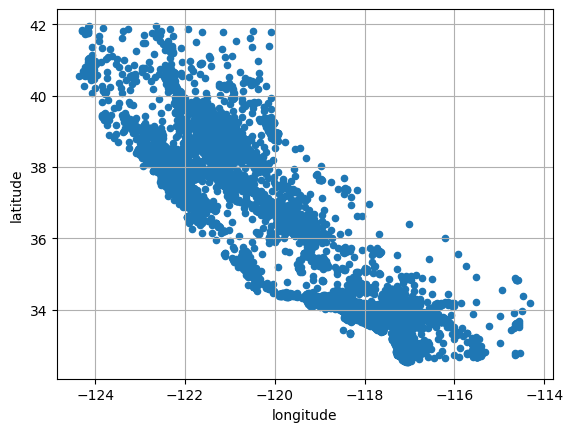

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid= True)
plt.show()

In [32]:
housing= strat_train_set.copy()

<function matplotlib.pyplot.show(close=None, block=None)>

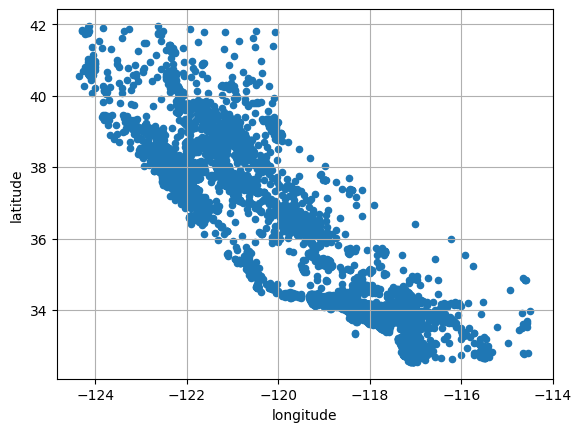

In [33]:
housing.plot(kind="scatter", x="longitude", y = "latitude", grid= True)
plt.show

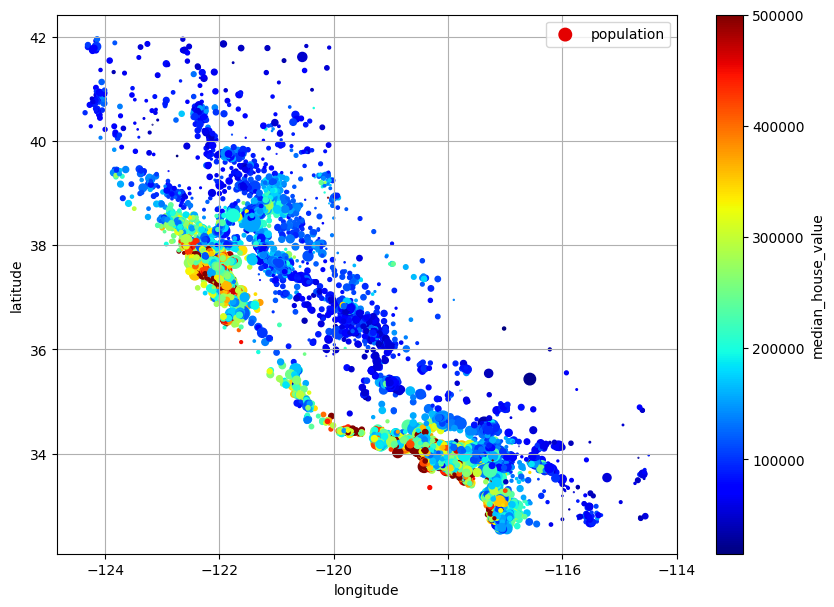

In [34]:


housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

plt.show()



In [35]:
corr_matrix = housing.corr(numeric_only=True)

In [36]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

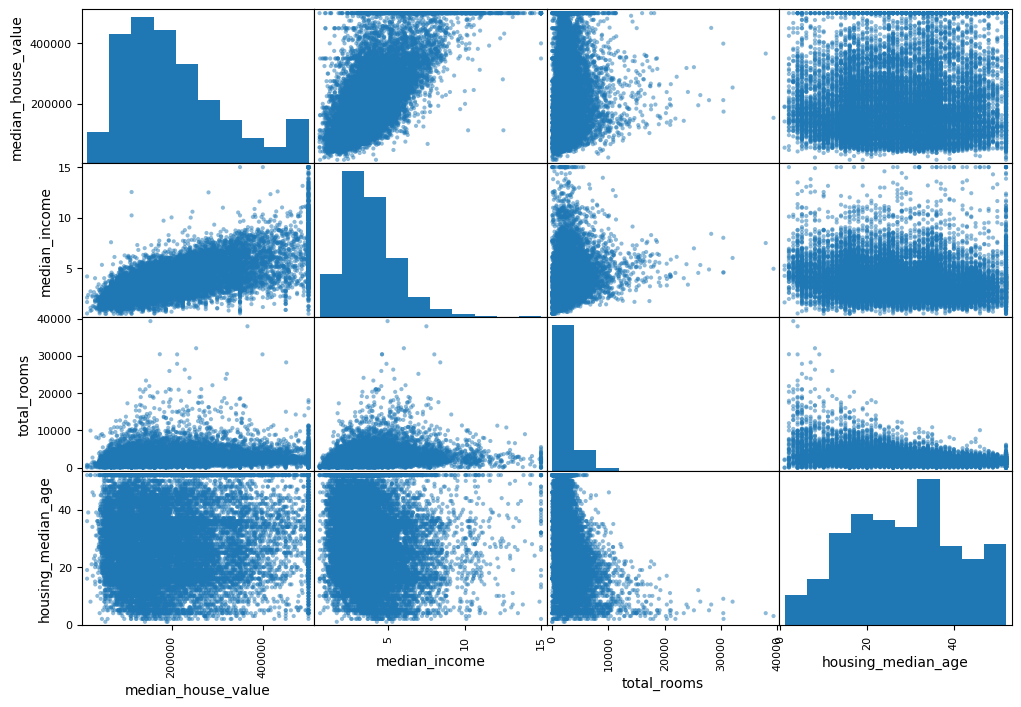

In [37]:
from pandas.plotting import scatter_matrix

attributes= ["median_house_value","median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12,8))
plt.show()

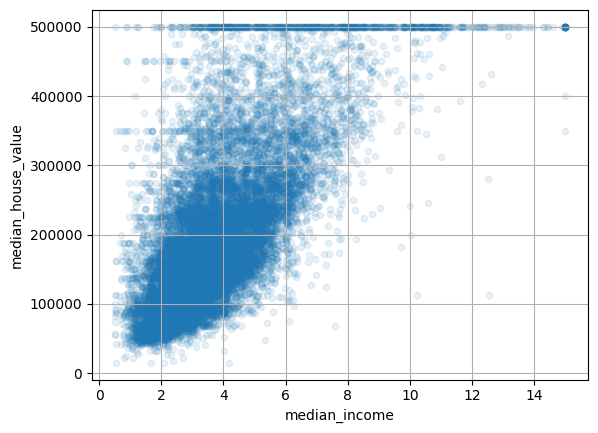

In [38]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
#save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

In [39]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [40]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

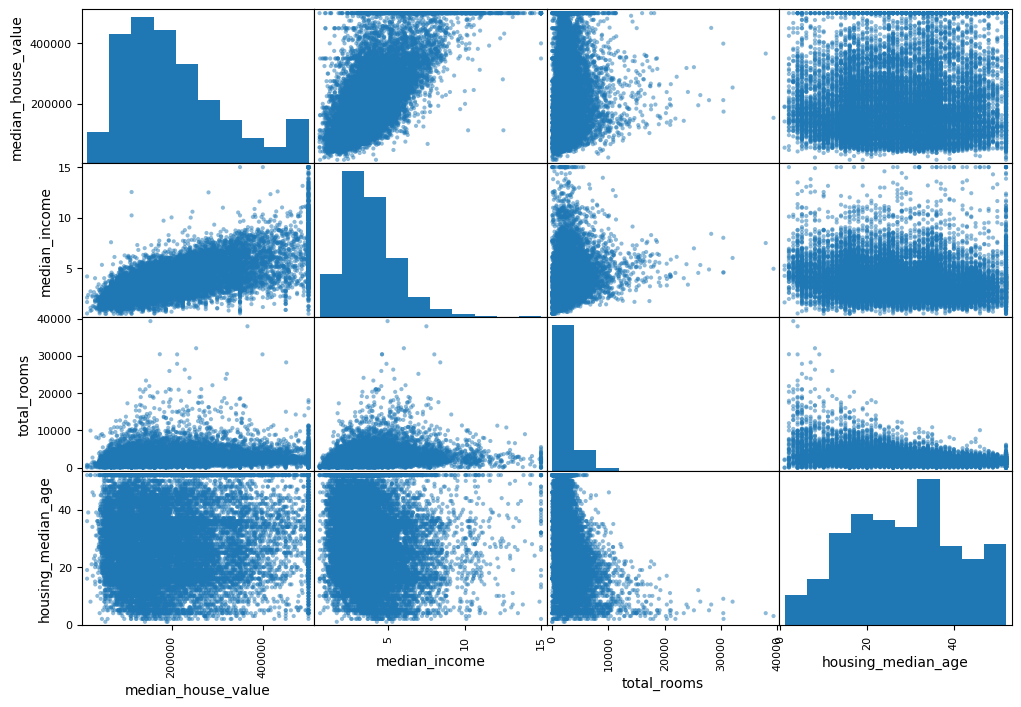

In [41]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income","total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

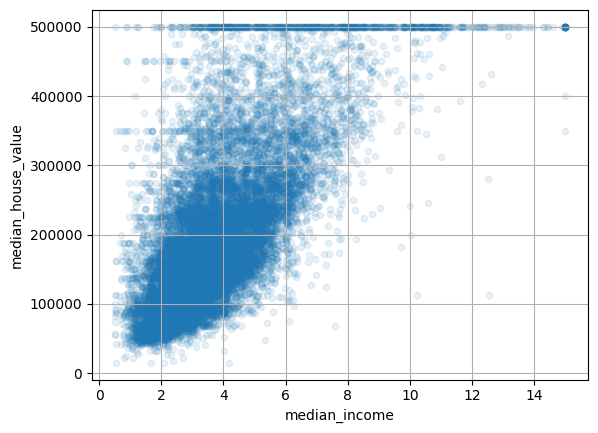

In [42]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
#save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

# expermenting with attribute combination


In [43]:
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"]/ housing["total_rooms"]
housing["people_per_house"]= housing["population"]/housing["households"]

In [44]:
housing = strat_train_set.drop("median_house_value", axis =1)
housing_labels = strat_train_set["median_house_value"].copy()

In [45]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,538.949094,1425.513929,499.990189,3.870428
std,2.000624,2.133294,12.585738,2185.287466,423.862079,1094.795467,382.865787,1.891936
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3154.000000,645.000000,1726.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [46]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3


In [47]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND,3
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,3
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN,3
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN,4
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN,5


In [48]:
housing_option1= housing.copy()
housing_option1.dropna(subset=["total_bedrooms"], inplace=True)
housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [49]:
housing_option2= housing.copy()
housing_option2.drop("total_bedrooms", axis=1 ,inplace=True)
housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND,3
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN,3
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN,3
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN,4
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN,5


In [50]:
housing_option3= housing.copy()
median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)
housing_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND,3
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN,3
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN,3
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN,4
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN,5


### To deal with missing values you can use above three methods i.e : 

.dropna()- get rid of corresponding district values; 

.drop()- get rid of whole attribute; 

.fillna()- set the values to some value like median, zero, mean etc-  these are all builtin functions in python or

you can use scikitlearn which provides a handy class to take of missing values : IMPUTER

In [51]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [52]:
housing_num = housing.select_dtypes(include=[np.number])

In [53]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [54]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [55]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [56]:
X = imputer.transform(housing_num)

In [57]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [58]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing_num.index)

In [59]:
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [60]:
imputer.strategy

'median'

In [61]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [62]:
outlier_pred

array([-1,  1,  1, ...,  1,  1,  1])

#Handling Text and Categorical Attributes

In [63]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [64]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [65]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [66]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [67]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot= cat_encoder.fit_transform(housing_cat)

In [68]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [69]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [70]:
cat_encoder = OneHotEncoder(sparse_output= False)
housing_cat_1hot= cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [71]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [72]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [73]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [74]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [75]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [76]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [77]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [78]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [79]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


# Feature Scaling

In [80]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [81]:
from sklearn.preprocessing import StandardScaler

std_scaler= StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [82]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)




In [83]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [84]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [85]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

Custom Transformers

In [86]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [88]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [89]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [90]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [91]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [92]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [93]:


cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)



In [94]:


similarities[:3].round(2)



array([[0.08, 0.  , 0.6 , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.14],
       [0.  , 0.99, 0.  , 0.04, 0.  , 0.  , 0.11, 0.  , 0.63, 0.  ],
       [0.44, 0.  , 0.3 , 0.  , 0.  , 0.7 , 0.  , 0.01, 0.  , 0.29]])

# Transformer pipelines

In [98]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [100]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [101]:
from sklearn import set_config

set_config(display='diagram')
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [102]:


housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)



array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [103]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [104]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [105]:


num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [106]:
num_pipeline[1]

StandardScaler()

In [108]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [110]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [111]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [112]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [113]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [114]:
housing_prepared = preprocessing.fit_transform(housing)

In [115]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [116]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 25)

In [117]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age', 'remainder__income_cat'],
      dtype=object)

# Select and train a model

Training and evaluating on the training set

In [119]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ee...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7eed78ca2520>)])),
                ('linearregression', LinearRegression())])

In [121]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([247100., 397600., 119400.,  95500., 326800.])

In [122]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [139]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
         return mean_squared_error(labels,predictions, squared=False)

lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse
         

0.0

In [140]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))

tree_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ee...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7eed78ca2520>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [141]:
housing_predictions =tree_reg.predict(housing)
tree_rsme = root_mean_squared_error(housing_labels, housing_predictions)
tree_rsme

0.0

# better evaluation using cross validation

In [142]:
from sklearn.model_selection import cross_val_score

tree_rsmes = cross_val_score(tree_reg, housing, housing_labels, scoring = "neg_root_mean_squared_error", cv =10)

In [143]:
pd.Series(tree_rsmes).describe()

count       10.000000
mean    -66828.991942
std       2109.500358
min     -70322.608451
25%     -68375.606282
50%     -66483.337336
75%     -65456.007554
max     -63504.013557
dtype: float64

In [144]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [145]:


pd.Series(forest_rmses).describe()



count       10.000000
mean     47007.661117
std       1071.885942
min      45438.898450
25%      46378.232205
50%      47090.462095
75%      47406.931316
max      49311.141107
dtype: float64

# Fine tune the model

In [150]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7eed78ca2520>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [151]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [152]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7eed796...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7eed78c8f100>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

# Random search

In [154]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [155]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eed78ccf1f0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eed78cc8430>},
                   random_state=42, scoring='neg_root_mean_squared_error')

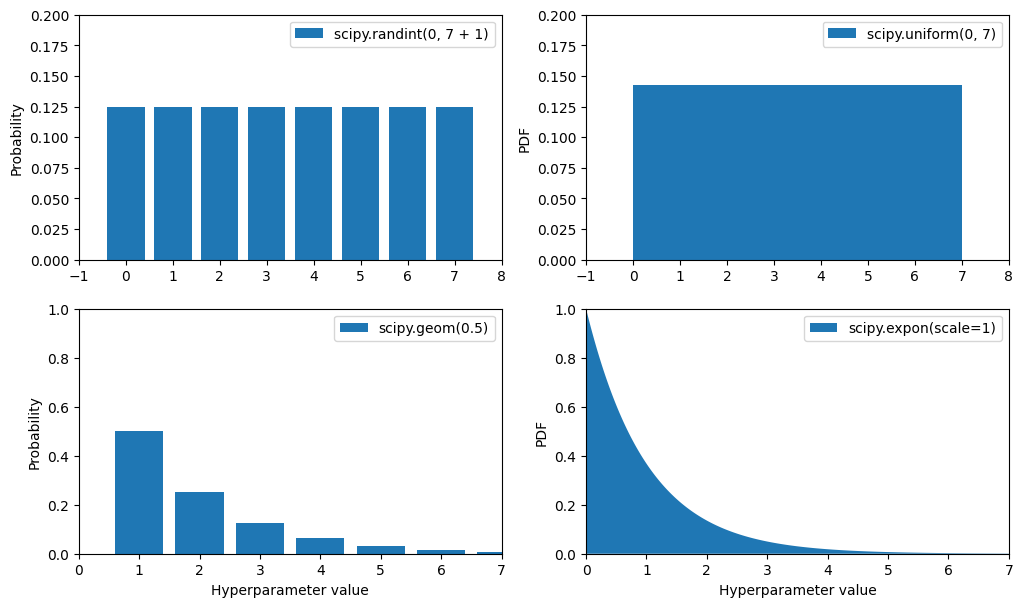

In [157]:
from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

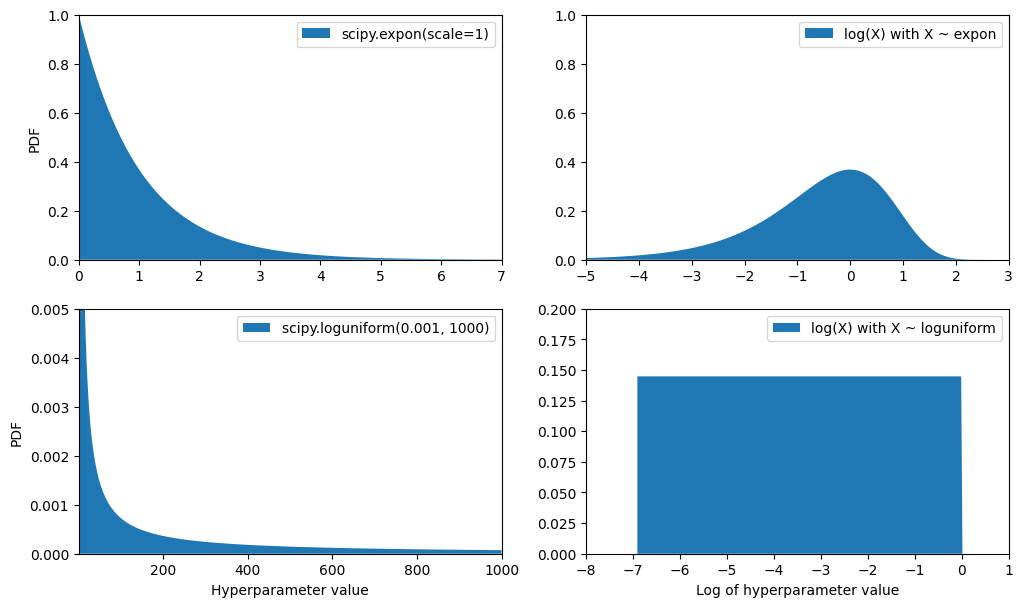

In [158]:
from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

# analyze models and their error

In [159]:
final_model = rnd_search.best_estimator_
feature_importance = final_model["random_forest"].feature_importances_
feature_importance.round(2)

array([0.05, 0.04, 0.05, 0.01, 0.01, 0.01, 0.01, 0.16, 0.01, 0.01, 0.01,
       0.04, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.01, 0.  , 0.01, 0.03, 0.02, 0.  , 0.01, 0.01, 0.02, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.02, 0.  , 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.06,
       0.  , 0.  , 0.  , 0.01, 0.12])

In [161]:
sorted(zip(feature_importance,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.16456260553039748, 'log__median_income'),
 (0.12264887480440562, 'remainder__income_cat'),
 (0.06144960021760335, 'cat__ocean_proximity_INLAND'),
 (0.05347502186039226, 'people_per_house__ratio'),
 (0.04783751917440328, 'bedrooms__ratio'),
 (0.040342284723807416, 'rooms_per_house__ratio'),
 (0.03711045390491348, 'geo__Cluster 3 similarity'),
 (0.028445462501172258, 'geo__Cluster 17 similarity'),
 (0.020716125281811163, 'geo__Cluster 6 similarity'),
 (0.018654183544598312, 'geo__Cluster 22 similarity'),
 (0.01721773323988542, 'geo__Cluster 32 similarity'),
 (0.015110660965319864, 'geo__Cluster 18 similarity'),
 (0.0142818282020754, 'geo__Cluster 41 similarity'),
 (0.013328388398764901, 'geo__Cluster 7 similarity'),
 (0.013214370003209028, 'geo__Cluster 43 similarity'),
 (0.012941557652072423, 'geo__Cluster 26 similarity'),
 (0.012566449621777647, 'remainder__housing_median_age'),
 (0.01207497972784075, 'geo__Cluster 2 similarity'),
 (0.011106515090172313, 'geo__Cluster 34 similarity

# evaluate syestem on test set

In [162]:
X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rsme = root_mean_squared_error(Y_test, final_predictions)
print(final_rsme)

41920.34240458236


In [164]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - Y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval

In [165]:
rmse_lower, rmse_upper

(40012.37071213927, 44193.9610781433)

# save the model

In [166]:
import joblib

In [167]:
joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

In [168]:
import joblib

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]
predictions = final_model_reloaded.predict(new_data)


In [169]:
predictions

array([432399.14, 452785.06, 107790.  ,  97622.  , 349001.06])